In [2]:
import pandas as pd
import numpy as np

import tarfile
import os
import csv

from scipy.io import loadmat

## 1. 데이터 분석 및 전처리

.dat -> .wav 

In [3]:
from scipy.io import wavfile
import numpy as np

for i in range(1, 209):
    file_path_dat = f'C:/Users/user/Desktop/VOICED DATASET/voice{i:03d}.dat'
    
    # Read data from DAT file
    with open(file_path_dat, 'rb') as file:
        raw_data = file.read()
        data = np.frombuffer(raw_data, dtype='<i4')  
    
    sampling_rate = 8000  # Sampling rate 
    
    wavfile.write(f'C:/Users/user/Desktop/voice_wav/voice{i:03d}.wav', sampling_rate, data)

파형출력

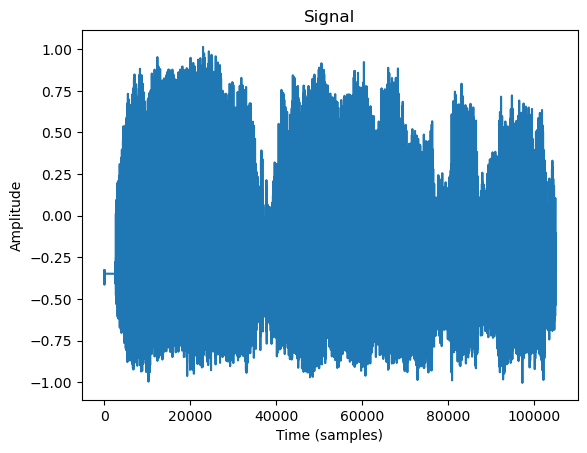

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('C:/Users/user/Desktop/voice_wav/voice105.wav')

plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

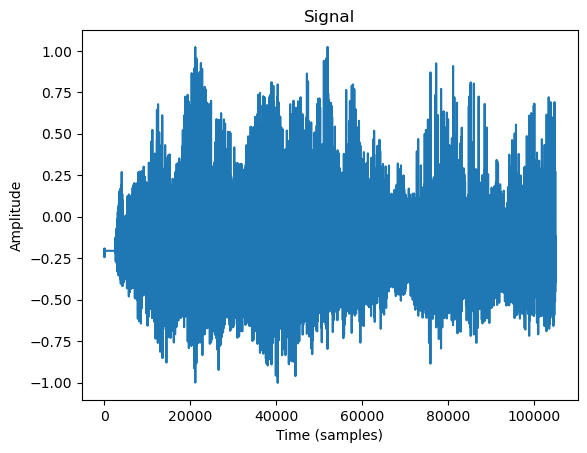

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('C:/Users/user/Desktop/voice_wav/voice130.wav')

plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

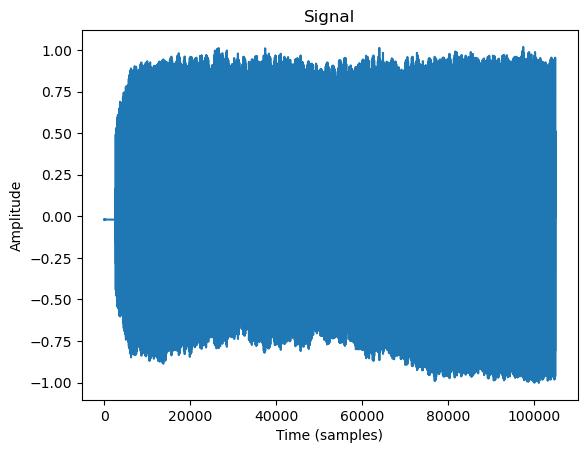

In [63]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('C:/Users/user/Desktop/voice_wav/voice002.wav')

plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

초반 일정 부분에 음성이 담기지 않은 것을 확인

파형을 육안으로 확인했을 때 샘플별로 다른 특징을 보이는 것을 확인

In [7]:
import librosa
import soundfile as sf

file_path = 'C:/Users/user/Desktop/voice_wav/voice002.wav'
y, sr = librosa.load(file_path)
silent_duration_to_remove = 0.12 

start_idx = 0
end_idx = int(silent_duration_to_remove * sr)  
trimmed_audio = y[end_idx:]  

sf.write('C:/Users/user/Desktop/voice/voice002.wav', trimmed_audio, sr)

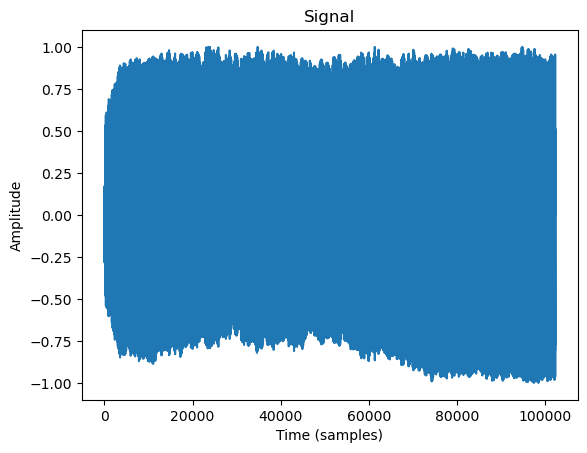

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('C:/Users/user/Desktop/voice/voice002.wav')

plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

0.12s 제거하는 것이 적합, 모든 데이터에 적용

In [9]:
import os
import librosa
import soundfile as sf

input_folder_path = 'C:/Users/user/Desktop/voice_wav/'
output_folder_path = 'C:/Users/user/Desktop/voice/'

for file_name in os.listdir(input_folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(input_folder_path, file_name)

        y, sr = librosa.load(file_path)

        silent_duration_to_remove = 0.11
        end_idx = int(silent_duration_to_remove * sr)
        trimmed_audio = y[end_idx:]

        output_file_path = os.path.join(output_folder_path, file_name)
        sf.write(output_file_path, trimmed_audio, sr)

## Spectrum

Fast Fourier Transform(FFT) : time domain -> frequency domain

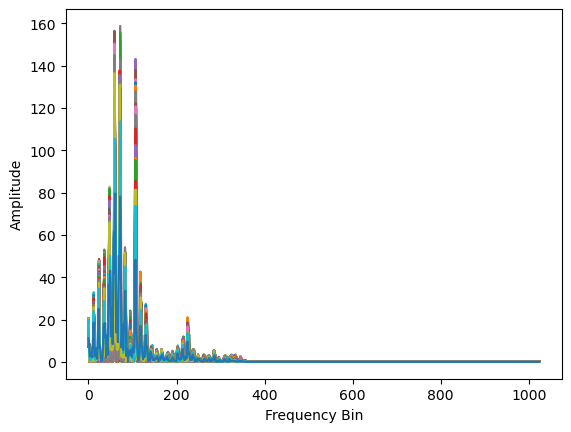

In [10]:
file_path = 'C:/Users/user/Desktop/voice/voice002.wav'
audio_segment, sr = librosa.load(file_path, sr=None) 

n_fft = 2048
hop_length = 512 
ft = np.abs(librosa.stft(audio_segment, n_fft=n_fft, hop_length=hop_length))

plt.plot(ft); 
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');
plt.show()

## Spectogram

non periodic signal의 spectrum

여러 segmnets에서 FFT 수행
y축을 log sclae로 변환, 진폭을 decibel로 변경 - 인간의 인지 범위

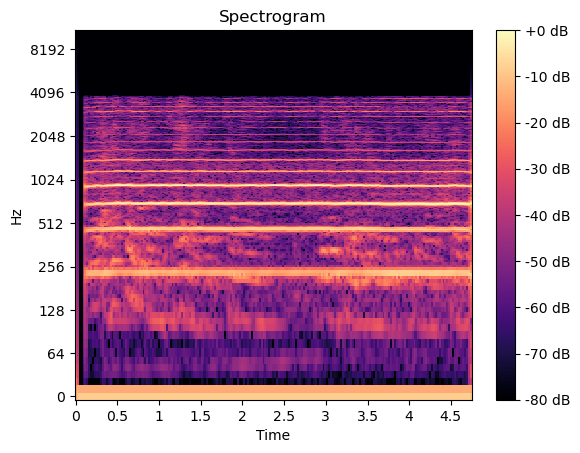

In [11]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

## Mel-spectogram

인간은 낮은 주파수에서의 차이를 더 잘 감지함 - y축을 mel scale에 매핑

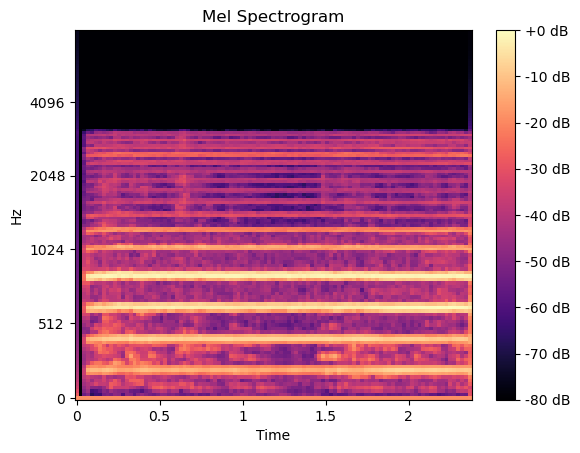

In [12]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

## MFCC

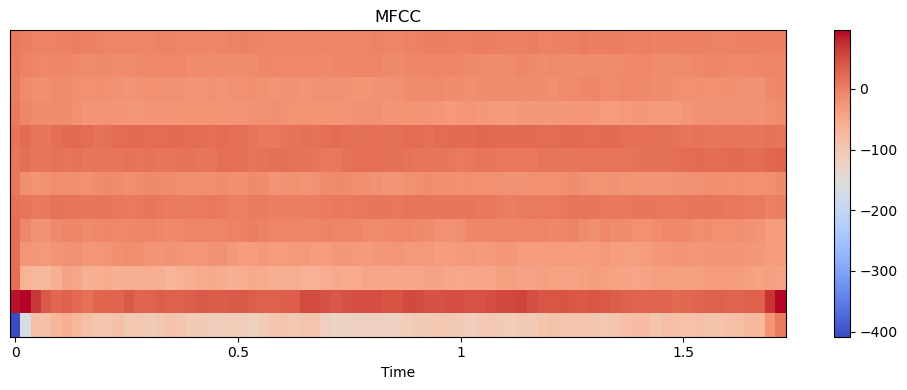

In [13]:
import librosa.display

# Load audio file
file_path_wav = 'C:/Users/user/Desktop/voice_wav/voice002.wav'
y, sr = librosa.load(file_path_wav, sr=8000)
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13) 

# Visualize MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

- Mel-spectrogram : 특정 domain에 적합, 연산량 많음

- MFCC : 도메인 한정 x, 연산량 적음

## 데이터 구조

In [14]:
import librosa

for i in range(1, 209):
    file_path_wav = f'C:/Users/user/Desktop/voice/voice{i:03d}.wav'

    y, sr = librosa.load(file_path_wav)

    duration = librosa.get_duration(y=y, sr=sr)

    sampling_rate = sr 

    data_shape = y.shape

    print(f"File: {file_path_wav}")
    print(f"Duration: {duration} seconds")
    print(f"Sampling Rate: {sampling_rate} Hz")
    print(f"Data Shape: {data_shape}")
    print("\n")

File: C:/Users/user/Desktop/voice/voice001.wav
Duration: 4.650022675736961 seconds
Sampling Rate: 22050 Hz
Data Shape: (102533,)


File: C:/Users/user/Desktop/voice/voice002.wav
Duration: 4.650022675736961 seconds
Sampling Rate: 22050 Hz
Data Shape: (102533,)


File: C:/Users/user/Desktop/voice/voice003.wav
Duration: 4.650022675736961 seconds
Sampling Rate: 22050 Hz
Data Shape: (102533,)


File: C:/Users/user/Desktop/voice/voice004.wav
Duration: 4.650022675736961 seconds
Sampling Rate: 22050 Hz
Data Shape: (102533,)


File: C:/Users/user/Desktop/voice/voice005.wav
Duration: 4.650022675736961 seconds
Sampling Rate: 22050 Hz
Data Shape: (102533,)


File: C:/Users/user/Desktop/voice/voice006.wav
Duration: 4.650022675736961 seconds
Sampling Rate: 22050 Hz
Data Shape: (102533,)


File: C:/Users/user/Desktop/voice/voice007.wav
Duration: 4.650022675736961 seconds
Sampling Rate: 22050 Hz
Data Shape: (102533,)


File: C:/Users/user/Desktop/voice/voice008.wav
Duration: 4.650022675736961 seconds


데이터 형태, 음성 길이에 차이가 있는 것을 확인

In [15]:
import os
import librosa
import numpy as np

input_folder_path = 'C:/Users/user/Desktop/voice/'
output_folder_path = 'C:/Users/user/Desktop/v/'

min_length = float('inf')  

for file_name in os.listdir(input_folder_path):
    if file_name.endswith('.wav'):
        file_path = os.path.join(input_folder_path, file_name)

        y, sr = librosa.load(file_path)

        duration = librosa.get_duration(y=y, sr=sr)
        if duration < min_length:
            min_length = duration

print(f"Shortest Duration: {min_length} seconds")

for i, file_name in enumerate(os.listdir(input_folder_path), start=1):
    if file_name.endswith('.wav'):
        file_path = os.path.join(input_folder_path, file_name)

        y, sr = librosa.load(file_path)

        target_samples = int(min_length * sr)
        current_samples = len(y)
        trimmed_audio = y[:target_samples]

        output_file_name = f'voice{i:03d}.wav'
        output_file_path = os.path.join(output_folder_path, output_file_name)
        sf.write(output_file_path, trimmed_audio, sr)

        trimmed_duration = librosa.get_duration(y=trimmed_audio, sr=sr)
        print(f"File: {output_file_path}")
        print(f"Padded Duration: {trimmed_duration} seconds")
        print(f"Padded Data Shape: {trimmed_audio.shape}")
        print("\n")

Shortest Duration: 4.610022675736961 seconds
File: C:/Users/user/Desktop/v/voice001.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice002.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice003.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice004.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice005.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice006.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice007.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice008.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user

File: C:/Users/user/Desktop/v/voice120.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice121.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice122.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice123.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice124.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice125.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice126.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice127.wav
Padded Duration: 4.610022675736961 seconds
Padded Data Shape: (101651,)


File: C:/Users/user/Desktop/v/voice128.wav
Padded Duration: 4.61

최소값을 기준으로 모든 데이터들을 동일하게 통일해줌

---------------------------------------------------------------

## label 구성

In [16]:
file_path = 'C:/Users/user/Desktop/VOICED DATASET/voice001-info.txt'

with open(file_path, 'r') as file:
    content = file.read()  

print(content)

ID	voice001
	
Age:	32
Gender:	m
Diagnosis:	hyperkinetic dysphonia
Occupation status:	Researcher
	
	
Voice Handicap Index (VHI) Score:	15
Reflux Symptom Index (RSI) Score:	5
	
	
Smoker:	no
Number of cigarettes smoked per day:	NU
	
Alcohol consumption:	casual drinker
Number of glasses containing alcoholic beverage drinked in a day	NU
Amount of water's litres drink every day:	1,5
	
Eating habits:	
Carbonated beverages:	almost never
Amount of glasses drinked in a day	NU
Tomatoes:	sometimes
Coffee:	almost always
Number of cups of coffee drinked in a day	4
Chocolate:	almost never
Gramme of chocolate eaten in  a day	NU
Soft cheese:	sometimes
Gramme of soft cheese eaten in a day	NU
Citrus fruits:	sometimes
Number of citrus fruits eaten in a day	NU



텍스트 파일에서 정보를 추출해와서 레이블로 구성

1. 나이

In [3]:
import os
import numpy as np

age_list = []

folder_path = 'C:/Users/user/Desktop/VOICED DATASET/'

for i in range(1, 209):
    file_name = f'voice{i:03d}-info.txt' 
    file_path = os.path.join(folder_path, file_name)

    with open(file_path, 'r') as file:
        content = file.read()
        lines = content.split('\n')
        for line in lines:
            if line.startswith('Age:'):
                age = line.split(':')[-1].strip()
                age_list.append(age)
                break 

for idx, age in enumerate(age_list, start=1):
    print(f'{idx} - {age}')

1 - 32
2 - 55
3 - 34
4 - 28
5 - 54
6 - 54
7 - 41
8 - 51
9 - 53
10 - 47
11 - 55
12 - 56
13 - 42
14 - 31
15 - 55
16 - 50
17 - 56
18 - 57
19 - 46
20 - 53
21 - 49
22 - 53
23 - 60
24 - 38
25 - 45
26 - 34
27 - 44
28 - 51
29 - 36
30 - 39
31 - 58
32 - 35
33 - 52
34 - 56
35 - 48
36 - 38
37 - 56
38 - 33
39 - 44
40 - 30
41 - 34
42 - 39
43 - 38
44 - 38
45 - 42
46 - 43
47 - 46
48 - 49
49 - 44
50 - 41
51 - 62
52 - 34
53 - 60
54 - 46
55 - 46
56 - 54
57 - 68
58 - 26
59 - 39
60 - 39
61 - 33
62 - 36
63 - 52
64 - 39
65 - 60
66 - 51
67 - 51
68 - 59
69 - 63
70 - 39
71 - 35
72 - 32
73 - 56
74 - 63
75 - 30
76 - 27
77 - 42
78 - 53
79 - 52
80 - 57
81 - 31
82 - 64
83 - 48
84 - 48
85 - 31
86 - 27
87 - 61
88 - 70
89 - 63
90 - 21
91 - 55
92 - 66
93 - 49
94 - 67
95 - 24
96 - 30
97 - 26
98 - 23
99 - 29
100 - 24
101 - 60
102 - 43
103 - 30
104 - 32
105 - 36
106 - 21
107 - 32
108 - 23
109 - 49
110 - 50
111 - 36
112 - 62
113 - 66
114 - 49
115 - 35
116 - 34
117 - 65
118 - 40
119 - 47
120 - 64
121 - 38
122 - 45
123 - 35
1

나이는 범주형 label로 변경
- 18 ~ 39 : adult
- 40 ~ 59 : middle-aged
- 60 ~ 70 : elderly

In [4]:
age_range_list = []

for age in age_list:
    age_num = int(age.split('-')[0])
    if 18 <= age_num <= 39:
        age_range_list.append('adult')
    elif 40 <= age_num <= 59:
        age_range_list.append('middle-aged')
    elif 60 <= age_num <= 70:
        age_range_list.append('elderly')     
      
 # 레이블링된 나이 범위 출력
for idx, age_range in enumerate(age_range_list, start=1):
    print(f'{idx} - {age_range}')

1 - adult
2 - middle-aged
3 - adult
4 - adult
5 - middle-aged
6 - middle-aged
7 - middle-aged
8 - middle-aged
9 - middle-aged
10 - middle-aged
11 - middle-aged
12 - middle-aged
13 - middle-aged
14 - adult
15 - middle-aged
16 - middle-aged
17 - middle-aged
18 - middle-aged
19 - middle-aged
20 - middle-aged
21 - middle-aged
22 - middle-aged
23 - elderly
24 - adult
25 - middle-aged
26 - adult
27 - middle-aged
28 - middle-aged
29 - adult
30 - adult
31 - middle-aged
32 - adult
33 - middle-aged
34 - middle-aged
35 - middle-aged
36 - adult
37 - middle-aged
38 - adult
39 - middle-aged
40 - adult
41 - adult
42 - adult
43 - adult
44 - adult
45 - middle-aged
46 - middle-aged
47 - middle-aged
48 - middle-aged
49 - middle-aged
50 - middle-aged
51 - elderly
52 - adult
53 - elderly
54 - middle-aged
55 - middle-aged
56 - middle-aged
57 - elderly
58 - adult
59 - adult
60 - adult
61 - adult
62 - adult
63 - middle-aged
64 - adult
65 - elderly
66 - middle-aged
67 - middle-aged
68 - middle-aged
69 - elderl

In [5]:
from collections import Counter

label_counts = Counter(age_range_list)

for label, count in label_counts.items():
    print(f'{label}: {count} 개')

adult: 84 개
middle-aged: 93 개
elderly: 31 개


2. 성별

In [6]:
import os

# 결과를 저장할 빈 리스트
gender_list = []

# 파일이 있는 디렉토리 경로
folder_path = 'C:/Users/user/Desktop/VOICED DATASET/'

# 001부터 208까지 파일 순회
for i in range(1, 209):
    file_name = f'voice{i:03d}-info.txt'  # 파일 이름 생성 (예: voice001-info.txt, voice002-info.txt, ...)
    file_path = os.path.join(folder_path, file_name)
    
    # 해당 파일을 열어서 성별 정보 추출하여 리스트에 추가
    with open(file_path, 'r') as file:
        content = file.read()
        lines = content.split('\n')
        for line in lines:
            if line.startswith('Gender:'): 
                gender = line.split(':')[-1].strip()
                gender_list.append(gender)
                break  # 성별 정보를 찾으면 해당 파일은 더 이상 검사하지 않음
                
for idx, gender in enumerate(gender_list, start=1):
    print(f'{idx} - {gender}')

1 - m
2 - m
3 - m
4 - f
5 - f
6 - f
7 - m
8 - f
9 - f
10 - f
11 - m
12 - m
13 - f
14 - f
15 - m
16 - f
17 - m
18 - f
19 - f
20 - m
21 - f
22 - f
23 - f
24 - m
25 - m
26 - m
27 - m
28 - f
29 - m
30 - f
31 - m
32 - m
33 - f
34 - f
35 - m
36 - f
37 - m
38 - m
39 - f
40 - m
41 - m
42 - f
43 - f
44 - f
45 - f
46 - f
47 - m
48 - m
49 - f
50 - f
51 - f
52 - f
53 - f
54 - m
55 - m
56 - f
57 - m
58 - f
59 - f
60 - m
61 - f
62 - m
63 - f
64 - m
65 - f
66 - f
67 - f
68 - f
69 - m
70 - f
71 - f
72 - m
73 - f
74 - f
75 - f
76 - m
77 - f
78 - f
79 - m
80 - f
81 - m
82 - m
83 - m
84 - f
85 - f
86 - f
87 - f
88 - f
89 - m
90 - f
91 - m
92 - m
93 - f
94 - f
95 - m
96 - f
97 - f
98 - f
99 - m
100 - m
101 - m
102 - f
103 - f
104 - m
105 - f
106 - m
107 - m
108 - m
109 - f
110 - m
111 - m
112 - f
113 - f
114 - m
115 - m
116 - f
117 - f
118 - m
119 - f
120 - m
121 - f
122 - f
123 - f
124 - f
125 - f
126 - f
127 - m
128 - f
129 - m
130 - f
131 - m
132 - m
133 - f
134 - f
135 - f
136 - f
137 - m
138 - f
139 

In [7]:
from collections import Counter

label_counts = Counter(gender_list)

for label, count in label_counts.items():
    print(f'{label}: {count} 개')

m: 72 개
f: 136 개


3. 병명

In [8]:
import os
import numpy as np

diagnosis_list = []

folder_path = 'C:/Users/user/Desktop/VOICED DATASET/'

for i in range(1, 209):
    file_name = f'voice{i:03d}-info.txt' 
    file_path = os.path.join(folder_path, file_name)
    
    with open(file_path, 'r') as file:
        content = file.read()
        lines = content.split('\n')
        for line in lines:
            if line.startswith('Diagnosis:'):
                diagnosis = line.split(':')[-1].strip()
                diagnosis_list.append(diagnosis)
                break  

for idx, diagnosis in enumerate(diagnosis_list, start=1):
    print(f'{idx} - {diagnosis}')

1 - hyperkinetic dysphonia
2 - healthy
3 - hyperkinetic dysphonia (nodule)
4 - hypokinetic dysphonia
5 - hypokinetic dysphonia
6 - hypokinetic dysphonia
7 - hyperkinetic dysphonia (nodule)
8 - reflux laryngitis
9 - hyperkinetic dysphonia (nodule)
10 - hypokinetic dysphonia
11 - reflux laryngitis
12 - reflux laryngitis
13 - reflux laryngitis
14 - reflux laryngitis
15 - reflux laryngitis
16 - hyperkinetic dysphonia
17 - hyperkinetic dysphonia
18 - hyperkinetic dysphonia
19 - healthy
20 - hyperkinetic dysphonia (Reinke's edema)
21 - hyperkinetic dysphonia
22 - hypokinetic dysphonia
23 - hyperkinetic dysphonia
24 - healthy
25 - healthy
26 - hypokinetic dysphonia
27 - reflux laryngitis
28 - reflux laryngitis
29 - reflux laryngitis
30 - reflux laryngitis
31 - reflux laryngitis
32 - healthy
33 - hyperkinetic dysphonia
34 - healthy
35 - reflux laryngitis
36 - hypokinetic dysphonia
37 - reflux laryngitis
38 - hyperkinetic dysphonia
39 - hyperkinetic dysphonia
40 - healthy
41 - reflux laryngitis

In [9]:
from collections import Counter

# Counter를 사용하여 각 레이블의 개수를 세기
diagnosis_count = Counter(diagnosis_list)

# 각 레이블과 개수 출력
for diagnosis, count in diagnosis_count.items():
    print(f"{diagnosis}: {count} 건")

hyperkinetic dysphonia: 43 건
healthy: 57 건
hyperkinetic dysphonia (nodule): 3 건
hypokinetic dysphonia: 22 건
reflux laryngitis: 38 건
hyperkinetic dysphonia (Reinke's edema): 3 건
hyperkinetic dysphonia (Cordite): 1 건
hyperkinetic dysphonia (Prolapse): 9 건
hyperkinetic dysphonia (Polyps): 5 건
hypokinetic dysphonia (Vocal fold paralysis): 4 건
hypokinetic dysphonia (Spasmodic dysphonia): 1 건
hypokinetic dysphonia (glottic insufficiency): 6 건
hypokinetic dysphonia (Conversion dysphonia): 1 건
hyperkinetic dysphonia (Vocal fold prolapse): 1 건
hypokinetic dysphonia (Dysphonia by chordal groove): 1 건
hyperkinetic dysphonia (polyps): 1 건
hypokinetic dysphonia (Laryngitis): 1 건
hypokinetic dysphonia (Bilateral vocal fold): 1 건
hyperkinetic dysphonia  (Rigid vocal fold): 1 건
hypokinetic dysphonia (Extraglottic air leak): 1 건
hyperkinetic dysphonia (Adduction deficit): 1 건
hypokinetic dysphonia (Presbiphonia): 1 건
hyperkinetic dysphonia (Vocal fold nodules): 1 건
hyperkinetic dysphonia (Vocal fold pa

***증상별로 구분하는 모델을 구축하기에는 데이터의 부족으로 불가능하다고 판단.

speech disorder / normal label로 프로젝트를 진행하기로 결정.

In [10]:
import os

diagnosis_list = []

folder_path = 'C:/Users/user/Desktop/VOICED DATASET/'

for i in range(1, 209):
    file_name = f'voice{i:03d}-info.txt'
    file_path = os.path.join(folder_path, file_name)

    with open(file_path, 'r') as file:
        content = file.read()
        lines = content.split('\n')
        for line in lines:
            if line.startswith('Diagnosis:'):
                diagnosis = line.split(':')[-1].strip()
                diagnosis_list.append(diagnosis)
                break

disorder_list = []

for diagnosis in diagnosis_list:
    if diagnosis == 'healthy':
        disorder_list.append('normal')
    else:
        disorder_list.append('speech disorder')

for idx, diagnosis in enumerate(disorder_list, start=1):
    print(f'{idx} - {diagnosis}')

1 - speech disorder
2 - normal
3 - speech disorder
4 - speech disorder
5 - speech disorder
6 - speech disorder
7 - speech disorder
8 - speech disorder
9 - speech disorder
10 - speech disorder
11 - speech disorder
12 - speech disorder
13 - speech disorder
14 - speech disorder
15 - speech disorder
16 - speech disorder
17 - speech disorder
18 - speech disorder
19 - normal
20 - speech disorder
21 - speech disorder
22 - speech disorder
23 - speech disorder
24 - normal
25 - normal
26 - speech disorder
27 - speech disorder
28 - speech disorder
29 - speech disorder
30 - speech disorder
31 - speech disorder
32 - normal
33 - speech disorder
34 - normal
35 - speech disorder
36 - speech disorder
37 - speech disorder
38 - speech disorder
39 - speech disorder
40 - normal
41 - speech disorder
42 - speech disorder
43 - speech disorder
44 - speech disorder
45 - normal
46 - speech disorder
47 - speech disorder
48 - speech disorder
49 - normal
50 - speech disorder
51 - normal
52 - speech disorder
53 - sp

In [11]:
from collections import Counter

label_counts = Counter(disorder_list)

for label, count in label_counts.items():
    print(f'{label}: {count} 개')

speech disorder: 151 개
normal: 57 개


4. VHI score : 음성 장애 수치

In [12]:
import os
import numpy as np

# 결과를 저장할 빈 리스트
vhi_score_list = []

# 파일이 있는 디렉토리 경로
folder_path = 'C:/Users/user/Desktop/VOICED DATASET/'

# 001부터 208까지 파일 순회
for i in range(1, 209):
    file_name = f'voice{i:03d}-info.txt'  # 파일 이름 생성 (예: voice001-info.txt, voice002-info.txt, ...)
    file_path = os.path.join(folder_path, file_name)
    
    # 해당 파일을 열어서 VHI Score 정보 추출하여 리스트에 추가
    with open(file_path, 'r') as file:
        content = file.read()
        lines = content.split('\n')
        for line in lines:
            if line.startswith('Voice Handicap Index (VHI) Score:'):
                vhi_score = line.split(':')[-1].strip()
                vhi_score_list.append(vhi_score)
                break  # VHI Score 정보를 찾으면 해당 파일은 더 이상 검사하지 않음
                
for idx, vhi_score in enumerate(vhi_score_list, start=1):
    print(f'{idx} - {vhi_score}')

1 - 15
2 - 17
3 - 42
4 - 20
5 - 39
6 - 39
7 - 24
8 - 19
9 - 10
10 - 9
11 - 31
12 - 4
13 - 8
14 - 11
15 - 0
16 - 19
17 - 43
18 - 19
19 - 45
20 - 9
21 - 25
22 - 86
23 - 13
24 - 6
25 - 16
26 - 31
27 - 0
28 - 11
29 - 3
30 - 57
31 - 16
32 - 16
33 - 24
34 - 19
35 - 17
36 - 8
37 - 24
38 - 17
39 - 28
40 - 1
41 - 0
42 - 53
43 - 17
44 - 11
45 - 3
46 - 5
47 - 3
48 - 12
49 - 4
50 - 39
51 - 2
52 - 10
53 - 20
54 - 15
55 - 15
56 - 6
57 - 11
58 - 14
59 - 10
60 - 10
61 - 19
62 - 0
63 - 1
64 - 31
65 - 25
66 - 12
67 - 7
68 - 11
69 - 11
70 - 24
71 - 7
72 - 63
73 - 35
74 - 5
75 - 7
76 - 18
77 - 1
78 - 14
79 - 5
80 - 40
81 - 8
82 - 2
83 - 2
84 - 10
85 - 11
86 - 0
87 - 63
88 - 15
89 - 11
90 - 0
91 - 0
92 - 0
93 - 24
94 - 28
95 - 29
96 - 3
97 - 13
98 - 13
99 - 28
100 - 0
101 - 80
102 - 67
103 - 27
104 - 0
105 - 31
106 - 35
107 - 22
108 - 0
109 - 11
110 - 5
111 - 0
112 - 44
113 - 17
114 - 13
115 - 26
116 - 59
117 - 51
118 - 14
119 - 22
120 - 22
121 - 31
122 - 23
123 - 0
124 - 41
125 - 0
126 - 2
127 - 3
128 - 8

VHI score는 범주형 label로 변경
- 0 ~ 30 : normal
- 31 ~ 60 : mild
- 61 ~ 90 : moderate
- 91 ~ 120 : severe

In [13]:
vhi_range_list = []

for vhi_score in vhi_score_list:
    vhi_num = int(vhi_score.split('-')[0])
    if 0 <= vhi_num <= 20:
        vhi_range_list.append('normal_vhi')
    elif 21 <= vhi_num <= 60:
        vhi_range_list.append('mild_vhi')
    elif 60 <= vhi_num <= 85:
        vhi_range_list.append('moderate_vhi')
    elif 86 <= vhi_num <= 120:
        vhi_range_list.append('severe_vhi')

for idx, vhi_range in enumerate(vhi_range_list, start=1):
    print(f'{idx} - {vhi_range}')

1 - normal_vhi
2 - normal_vhi
3 - mild_vhi
4 - normal_vhi
5 - mild_vhi
6 - mild_vhi
7 - mild_vhi
8 - normal_vhi
9 - normal_vhi
10 - normal_vhi
11 - mild_vhi
12 - normal_vhi
13 - normal_vhi
14 - normal_vhi
15 - normal_vhi
16 - normal_vhi
17 - mild_vhi
18 - normal_vhi
19 - mild_vhi
20 - normal_vhi
21 - mild_vhi
22 - severe_vhi
23 - normal_vhi
24 - normal_vhi
25 - normal_vhi
26 - mild_vhi
27 - normal_vhi
28 - normal_vhi
29 - normal_vhi
30 - mild_vhi
31 - normal_vhi
32 - normal_vhi
33 - mild_vhi
34 - normal_vhi
35 - normal_vhi
36 - normal_vhi
37 - mild_vhi
38 - normal_vhi
39 - mild_vhi
40 - normal_vhi
41 - normal_vhi
42 - mild_vhi
43 - normal_vhi
44 - normal_vhi
45 - normal_vhi
46 - normal_vhi
47 - normal_vhi
48 - normal_vhi
49 - normal_vhi
50 - mild_vhi
51 - normal_vhi
52 - normal_vhi
53 - normal_vhi
54 - normal_vhi
55 - normal_vhi
56 - normal_vhi
57 - normal_vhi
58 - normal_vhi
59 - normal_vhi
60 - normal_vhi
61 - normal_vhi
62 - normal_vhi
63 - normal_vhi
64 - mild_vhi
65 - mild_vhi
66 

In [14]:
from collections import Counter

label_counts = Counter(vhi_range_list)

for label, count in label_counts.items():
    print(f'{label}: {count} 개')

normal_vhi: 116 개
mild_vhi: 72 개
severe_vhi: 7 개
moderate_vhi: 13 개


5. rsi score : 위장 문제 심각도

RSI가 13점 이상인 경우 인후두 역류질환으로 진단

In [15]:
import os
import numpy as np

rsi_score_list = []

folder_path = 'C:/Users/user/Desktop/VOICED DATASET/'

for i in range(1, 209):
    file_name = f'voice{i:03d}-info.txt'  
    file_path = os.path.join(folder_path, file_name)

    with open(file_path, 'r') as file:
        content = file.read()
        lines = content.split('\n')
        for line in lines:
            if line.startswith('Reflux Symptom Index (RSI) Score:'):
                rsi_score = line.split(':')[-1].strip()
                rsi_score_list.append(rsi_score)
                break 
                
for idx, rsi_score in enumerate(rsi_score_list, start=1):
    print(f'{idx} - {rsi_score}')

1 - 5
2 - 12
3 - 26
4 - 9
5 - 23
6 - 25
7 - 28
8 - 15
9 - 15
10 - 12
11 - 27
12 - 3
13 - 25
14 - 20
15 - 29
16 - 13
17 - 20
18 - 26
19 - 10
20 - 22
21 - 8
22 - 20
23 - 18
24 - 12
25 - 1
26 - 1
27 - 19
28 - 20
29 - 10
30 - 23
31 - 21
32 - 18
33 - 16
34 - 16
35 - 15
36 - 21
37 - 12
38 - 14
39 - 11
40 - 25
41 - 0
42 - 11
43 - 41
44 - 14
45 - 20
46 - 26
47 - 4
48 - 5
49 - 20
50 - 3
51 - 13
52 - 6
53 - 10
54 - 19
55 - 10
56 - 25
57 - 6
58 - 5
59 - 25
60 - 9
61 - 12
62 - 15
63 - 12
64 - 0
65 - 15
66 - 4
67 - 13
68 - 12
69 - 10
70 - 0
71 - 20
72 - 11
73 - 23
74 - 20
75 - 19
76 - 17
77 - 0
78 - 18
79 - 15
80 - 16
81 - 5
82 - 3
83 - 11
84 - 7
85 - 4
86 - 14
87 - 20
88 - 8
89 - 20
90 - 11
91 - 14
92 - 18
93 - 13
94 - 17
95 - 0
96 - 0
97 - 12
98 - 18
99 - 21
100 - 5
101 - 10
102 - 15
103 - 22
104 - 21
105 - 26
106 - 13
107 - 10
108 - 4
109 - 14
110 - 15
111 - 21
112 - 15
113 - 10
114 - 6
115 - 14
116 - 5
117 - 11
118 - 13
119 - 0
120 - 4
121 - 4
122 - 3
123 - 3
124 - 17
125 - 11
126 - 13
127 - 14

RSI score는 범주형 label로 변경
- 0 ~ 12 : normal_rsi
- 13 ~ 45 : severe_rsi

In [16]:
rsi_range_list = []

for rsi_score in rsi_score_list:
    rsi_num = int(rsi_score.split('-')[0])
    if 0 <= rsi_num <= 12:
        rsi_range_list.append('normal_rsi')
    elif 13 <= rsi_num <= 45:
        rsi_range_list.append('disorder_rsi')

for idx, rsi_range in enumerate(rsi_range_list, start=1):
    print(f'{idx} - {rsi_range}')

1 - normal_rsi
2 - normal_rsi
3 - disorder_rsi
4 - normal_rsi
5 - disorder_rsi
6 - disorder_rsi
7 - disorder_rsi
8 - disorder_rsi
9 - disorder_rsi
10 - normal_rsi
11 - disorder_rsi
12 - normal_rsi
13 - disorder_rsi
14 - disorder_rsi
15 - disorder_rsi
16 - disorder_rsi
17 - disorder_rsi
18 - disorder_rsi
19 - normal_rsi
20 - disorder_rsi
21 - normal_rsi
22 - disorder_rsi
23 - disorder_rsi
24 - normal_rsi
25 - normal_rsi
26 - normal_rsi
27 - disorder_rsi
28 - disorder_rsi
29 - normal_rsi
30 - disorder_rsi
31 - disorder_rsi
32 - disorder_rsi
33 - disorder_rsi
34 - disorder_rsi
35 - disorder_rsi
36 - disorder_rsi
37 - normal_rsi
38 - disorder_rsi
39 - normal_rsi
40 - disorder_rsi
41 - normal_rsi
42 - normal_rsi
43 - disorder_rsi
44 - disorder_rsi
45 - disorder_rsi
46 - disorder_rsi
47 - normal_rsi
48 - normal_rsi
49 - disorder_rsi
50 - normal_rsi
51 - disorder_rsi
52 - normal_rsi
53 - normal_rsi
54 - disorder_rsi
55 - normal_rsi
56 - disorder_rsi
57 - normal_rsi
58 - normal_rsi
59 - disord

In [17]:
from collections import Counter

label_counts = Counter(rsi_range_list)

for label, count in label_counts.items():
    print(f'{label}: {count} 개')

normal_rsi: 111 개
disorder_rsi: 97 개


5. 흡연

In [18]:
import os
import numpy as np

smoker_list = []

folder_path = 'C:/Users/user/Desktop/VOICED DATASET/'

for i in range(1, 209):
    file_name = f'voice{i:03d}-info.txt'  
    file_path = os.path.join(folder_path, file_name)

    with open(file_path, 'r') as file:
        content = file.read()
        lines = content.split('\n')
        for line in lines:
            if line.startswith('Smoker:'):
                smoker = line.split(':')[-1].strip()
                smoker_list.append(smoker)
                break  

for idx, smoker in enumerate(smoker_list, start=1):
    print(f'{idx} - {smoker}')

1 - no
2 - casual smoker
3 - no
4 - casual smoker
5 - no
6 - no
7 - yes
8 - no
9 - yes
10 - no
11 - no
12 - no
13 - no
14 - no
15 - No
16 - yes
17 - No
18 - No
19 - yes
20 - yes
21 - No
22 - No
23 - No
24 - No
25 - No
26 - No
27 - No
28 - yes
29 - No
30 - No
31 - No
32 - No
33 - No
34 - No
35 - No
36 - No
37 - No
38 - No
39 - yes
40 - No
41 - No
42 - No
43 - No
44 - No
45 - No
46 - No
47 - No
48 - No
49 - casual smoker
50 - No
51 - No
52 - No
53 - No
54 - No
55 - No
56 - yes
57 - No
58 - No
59 - No
60 - No
61 - casual smoker
62 - No
63 - yes
64 - No
65 - No
66 - No
67 - yes
68 - No
69 - casual smoker
70 - yes
71 - yes
72 - No
73 - No
74 - yes
75 - No
76 - No
77 - No
78 - No
79 - No
80 - yes
81 - No
82 - No
83 - No
84 - No
85 - No
86 - no
87 - yes
88 - no
89 - no
90 - no
91 - no
92 - no
93 - no
94 - no
95 - no
96 - no
97 - no
98 - no
99 - no
100 - no
101 - no
102 - no
103 - no
104 - no
105 - yes
106 - casual smoker
107 - yes
108 - no
109 - yes
110 - no
111 - no
112 - no
113 - yes
114 - 

'no' label이 'No', 'no' 두 가지로 나뉨 -> 하나로 통일

In [19]:
for idx, value in enumerate(smoker_list):
    if value.lower() == 'no':
        smoker_list[idx] = 'no'

# 결과 출력
for idx, smoker in enumerate(smoker_list, start=1):
    print(f'{idx} - {smoker}')

1 - no
2 - casual smoker
3 - no
4 - casual smoker
5 - no
6 - no
7 - yes
8 - no
9 - yes
10 - no
11 - no
12 - no
13 - no
14 - no
15 - no
16 - yes
17 - no
18 - no
19 - yes
20 - yes
21 - no
22 - no
23 - no
24 - no
25 - no
26 - no
27 - no
28 - yes
29 - no
30 - no
31 - no
32 - no
33 - no
34 - no
35 - no
36 - no
37 - no
38 - no
39 - yes
40 - no
41 - no
42 - no
43 - no
44 - no
45 - no
46 - no
47 - no
48 - no
49 - casual smoker
50 - no
51 - no
52 - no
53 - no
54 - no
55 - no
56 - yes
57 - no
58 - no
59 - no
60 - no
61 - casual smoker
62 - no
63 - yes
64 - no
65 - no
66 - no
67 - yes
68 - no
69 - casual smoker
70 - yes
71 - yes
72 - no
73 - no
74 - yes
75 - no
76 - no
77 - no
78 - no
79 - no
80 - yes
81 - no
82 - no
83 - no
84 - no
85 - no
86 - no
87 - yes
88 - no
89 - no
90 - no
91 - no
92 - no
93 - no
94 - no
95 - no
96 - no
97 - no
98 - no
99 - no
100 - no
101 - no
102 - no
103 - no
104 - no
105 - yes
106 - casual smoker
107 - yes
108 - no
109 - yes
110 - no
111 - no
112 - no
113 - yes
114 - 

In [20]:
from collections import Counter

label_counts = Counter(smoker_list)

for label, count in label_counts.items():
    print(f'{label}: {count} 개')

no: 154 개
casual smoker: 11 개
yes: 43 개


6. 음주

In [21]:
import os
import numpy as np

alcohol_list = []

folder_path = 'C:/Users/user/Desktop/VOICED DATASET/'

for i in range(1, 209):
    file_name = f'voice{i:03d}-info.txt'  
    file_path = os.path.join(folder_path, file_name)

    with open(file_path, 'r') as file:
        content = file.read()
        lines = content.split('\n')
        for line in lines:
            if line.startswith('Alcohol consumption:'):
                alcohol = line.split(':')[-1].strip()
                alcohol_list.append(alcohol)
                break 

for idx, alcohol in enumerate(alcohol_list, start=1):
    print(f'{idx} - {alcohol}')

1 - casual drinker
2 - habitual drinker
3 - casual drinker
4 - casual drinker
5 - casual drinker
6 - casual drinker
7 - habitual drinker
8 - casual drinker
9 - habitual drinker
10 - casual drinker
11 - casual drinker
12 - casual drinker
13 - casual drinker
14 - casual drinker
15 - casual drinker
16 - habitual drinker
17 - habitual drinker
18 - nondrinker
19 - nondrinker
20 - nondrinker
21 - nondrinker
22 - nondrinker
23 - nondrinker
24 - casual drinker
25 - habitual drinker
26 - casual drinker
27 - casual drinker
28 - nondrinker
29 - casual drinker
30 - nondrinker
31 - nondrinker
32 - casual drinker
33 - nondrinker
34 - casual drinker
35 - casual drinker
36 - nondrinker
37 - casual drinker
38 - casual drinker
39 - casual drinker
40 - casual drinker
41 - casual drinker
42 - nondrinker
43 - nondrinker
44 - casual drinker
45 - casual drinker
46 - nondrinker
47 - habitual drinker
48 - habitual drinker
49 - casual drinker
50 - habitual drinker
51 - nondrinker
52 - nondrinker
53 - nondrinker

-------------------------------------------------------------------

MFCC로 특징 추출

통계적 특성도 파악하고자 최댓값, 최솟값, 평균, 중앙값, 제 1,3 분위수에 대한 변수도 추가

In [22]:
import numpy as np
import librosa
import os
import time

directory_path = 'C:/Users/user/Desktop/v'
all_variables = []

start_time = time.time()

for filename in os.listdir(directory_path):
    if filename.endswith('.wav'): 
        file_path = os.path.join(directory_path, filename)
        audio_signal, sampling_rate = librosa.load(file_path)

        mfcc_features = librosa.feature.mfcc(y=audio_signal, sr=sampling_rate, n_mfcc=13)

        max_vals = np.max(mfcc_features, axis=1)
        min_vals = np.min(mfcc_features, axis=1)
        mean_vals = np.mean(mfcc_features, axis=1)
        median_vals = np.median(mfcc_features, axis=1)
        q1_vals = np.percentile(mfcc_features, 25, axis=1)
        q3_vals = np.percentile(mfcc_features, 75, axis=1)

        variables = np.concatenate((max_vals, min_vals, mean_vals, median_vals, q1_vals, q3_vals), axis=None)
        all_variables.append(variables)
        
        print(f'Variables for {filename}: {variables}')

end_time = time.time()
execution_time = end_time - start_time  
        
X = np.array(all_variables)
print(f'소요 시간: {execution_time} seconds\n')
print(X.shape)

Variables for voice001.wav: [ -89.62854767  268.00454712  -27.57597733   -4.61363602   27.38843918
   -0.43640271   30.75361443   33.45327759    0.2963016    10.52333164
   28.59692001   20.29976845   14.07775307 -202.2951355   157.5330658
 -107.27598572  -31.5770607    -2.80529022  -47.09937668    8.48138237
   16.47236633  -33.52924347   -6.6297369     6.97246885   -1.72985435
   -8.8996954  -167.42750549  254.54086304  -96.91577148  -19.23558617
   17.34459496  -40.02757263   21.49771309   26.05781364  -24.45913124
    2.55223036   18.14418793    8.53583336    2.78632164 -167.69485474
  255.12358093  -97.8732605   -19.57269287   17.53835678  -40.53657913
   21.52394867   26.07442665  -24.17689323    3.12721205   17.23160553
    8.42219734    3.67247295 -170.73873138  253.60861969 -100.28191376
  -22.29174805   13.43708229  -42.91739845   18.51324177   24.44845772
  -27.15840912    0.70735916   14.8611021     5.7872169    -1.10461438
 -163.68280792  258.71360779  -95.086689    -16.67

Variables for voice011.wav: [-116.21525574  222.63601685  -67.02868652   -0.42576495   30.08321953
  -19.41557503   40.57247925   31.39163589  -17.3509407    19.2329464
   22.38174438    5.61499214    5.59609747 -205.07373047  127.67722321
 -133.29043579  -32.01896286    2.78315973  -45.79912567   13.44118977
    9.48945713  -40.47822952   -0.50812948    9.5813036   -16.20731163
  -12.07223129 -186.27536011  207.88446045 -113.48139191  -20.11235428
   15.81891346  -36.98704147   26.88400269   19.79133034  -30.37558937
   10.50901031   16.48036575   -9.75799084   -3.73313212 -186.89111328
  209.54119873 -113.37249756  -19.75683212   16.15149689  -37.25350189
   26.65314865   19.47597885  -30.4102211    10.39251137   16.48616219
   -9.77393246   -3.20861292 -191.26168823  206.26462555 -117.06187057
  -23.81054115   12.55533457  -39.23278046   24.30590439   15.91589594
  -32.98778343    7.65853119   14.9287343   -11.93434238   -5.5728941
 -183.52365112  212.7374649  -110.35691833  -16.212

Variables for voice021.wav: [-1.17907745e+02  2.63315430e+02  7.39267969e+00  5.24864674e+00
  3.30141296e+01  2.54161110e+01  4.52152863e+01  2.92803173e+01
 -3.12588620e+00  9.26299000e+00  2.50318890e+01  1.35120468e+01
  6.03039742e+00 -2.42897324e+02  1.25819199e+02 -9.64617615e+01
 -3.79843903e+01  2.88312107e-01 -2.24931126e+01  2.37884712e+01
  9.58071136e+00 -4.61280060e+01 -4.73787928e+00  1.04221230e+01
 -1.95244064e+01 -1.04243298e+01 -2.03766800e+02  2.37776184e+02
 -6.82916794e+01 -1.64647141e+01  2.16347561e+01 -1.20813322e+01
  3.78176041e+01  2.12773361e+01 -3.52982254e+01  1.95598352e+00
  1.84550457e+01 -1.03221540e+01 -3.26350474e+00 -1.98351776e+02
  2.39556976e+02 -6.95337067e+01 -1.62902946e+01  2.23448982e+01
 -1.29220524e+01  3.78107567e+01  2.16503239e+01 -3.44929581e+01
  1.98614573e+00  1.85643234e+01 -1.08929739e+01 -3.62411451e+00
 -2.23523758e+02  2.30792358e+02 -7.82392349e+01 -2.07510920e+01
  1.89560919e+01 -1.61108751e+01  3.53336945e+01  1.92580976e+

Variables for voice029.wav: [ -25.1877861   260.20953369    5.13312149   19.97110748   17.36285019
    6.5780468    59.01129913   27.1558609    -5.33176136   29.1136055
   22.05600166    9.81340408   29.00481796 -189.11398315  122.47592926
 -101.90328979   -7.45483303  -12.90468407  -49.65739822   27.18478012
   10.27683926  -46.51372528    8.93362427    8.06257629   -8.66215515
   13.89357567 -147.5521698   249.31628418  -86.23608398   10.60832882
    9.7185955   -40.55086136   53.69125748   20.12022972  -40.07539749
   21.35028458   14.6607008    -4.29812717   22.77860069 -148.11552429
  252.45471191  -88.62970734   11.2640543    10.00161934  -42.08288574
   53.7518692    20.48088455  -40.65171814   21.2407589    14.5000782
   -4.57144451   22.88809013 -152.14350128  249.38173676  -91.52493668
    7.160748      7.80656362  -44.66568565   52.24541092   18.18698883
  -41.95184326   19.58795834   12.9862299    -5.49579525   20.95434093
 -143.56213379  254.84568024  -83.15450668   15.324

Variables for voice038.wav: [-138.43612671  268.43032837  -54.26824951    9.65991306   15.20320797
  -25.53600502   52.94544983   34.81266022  -24.24055099   17.9147377
   26.20350456    7.28661156   13.44036388 -189.88139343  178.66137695
 -121.2736969   -32.63834381  -15.35065842  -60.46446228   35.97216034
   21.12233734  -43.9209671     4.78012848   15.60151005   -8.94500637
    0.97072065 -173.44187927  253.9466095  -107.25518036  -14.07551193
    1.8302319   -48.91768265   45.73940659   30.03951454  -35.85374451
   12.58071327   18.81695175   -4.13238049    8.27297401 -172.95635986
  255.22702026 -108.32686615  -15.75285721    2.48086023  -49.87605667
   45.41419601   30.43170547  -35.40004349   12.62657738   18.77079391
   -4.25149584    8.26242447 -179.7851181   252.82879639 -114.23787689
  -19.99327946   -1.56214529  -53.16981506   43.19797134   29.14658928
  -38.85098839   11.19332504   17.85082626   -5.36227846    7.14092779
 -168.1966629   257.70762634 -103.39855576   -7.61

Variables for voice046.wav: [ -53.02233505  224.30062866   -8.76185799   24.87287903   46.92881393
   24.42936516   48.52797699    0.35353768   -2.02147198   45.5514679
   16.2491703     4.20343685   26.48708725 -206.57888794  124.68154907
 -124.50406647    1.44440651   15.36018944  -29.66742897   16.62768555
  -14.8222065   -44.20318222   19.0178833     2.44984531  -25.18661499
    5.04668999 -155.97142029  200.82502747 -109.4778595    14.30259037
   35.88739014  -19.16150093   39.04125977   -7.18659353  -36.92092896
   37.64675903    8.74793434  -19.03092384   17.48857498 -156.21679688
  201.35398865 -110.84513092   15.73692894   36.3226738   -19.65271187
   38.96744537   -7.03318548  -36.86903763   38.17848587    8.82475471
  -19.43901253   17.55091095 -163.36483002  197.60234833 -115.01645279
   10.61983633   31.51844883  -21.95271683   36.41119003   -9.03364086
  -39.77184486   34.89418793    7.15081859  -21.08558083   15.24558449
 -150.58734894  206.80018616 -105.84780884   18.28

Variables for voice055.wav: [ -47.96432495  255.46328735   16.48445892    3.5715816    15.14061737
   -5.89725018   25.51264954   32.31118011   10.70352745   16.98034859
    9.84844017   12.58476543   15.6485939  -215.57723999  145.54833984
  -80.88691711  -13.76272964  -18.06730652  -54.90781784    8.64794254
   14.46835899  -23.27122116   -4.4117775    -5.67122555  -12.30074978
   -0.6006484  -172.54997253  237.00494385  -67.62833405   -6.28124619
    7.24146748  -44.57048416   17.67098999   23.07134628  -13.39296627
    9.39586067    2.06274462   -6.06018114    9.54446411 -172.42930603
  239.13861084  -69.21434021   -6.40622616    8.05477333  -45.14388657
   17.82175255   23.00323105  -13.76277542   10.0465641     2.01498222
   -6.56764221    9.67745399 -177.54244232  236.75999451  -72.49068451
   -8.01908255    5.06991744  -47.58163071   15.80815411   20.35495186
  -15.32233429    7.5494709    -0.28588164   -8.09990454    7.28214002
 -169.10551453  241.04872894  -65.97864532   -4.5

Variables for voice062.wav: [ -68.77536011  248.15240479  -25.80635834    6.69628143   26.38343811
   -6.47712231   39.89752579   30.95148087   -3.37797832   17.193367
   13.21200943   12.31950283   12.54855919 -214.77081299  154.0874939
 -134.92352295  -31.05797195   -9.2561655   -53.14001846   22.27951431
   21.49335098  -33.38122559   -1.25876665    2.94734168  -14.79904747
    0.4929477  -176.2409668   229.14331055 -122.73407745  -13.88500595
   14.3075428   -46.95085907   33.10310364   27.17463875  -27.30184555
   10.44337177    7.64117098   -8.17157555    7.69614697 -175.88529968
  227.43852234 -124.28076172  -12.02453804   15.06835175  -47.45100403
   33.31103134   27.37741852  -27.37668991   10.80838203    7.59822369
   -8.49053383    7.94288731 -187.33735657  219.92402649 -128.07663727
  -22.33569336   10.0503006   -49.27854919   31.20724201   25.9499073
  -29.63345432    8.62369967    6.38166332  -10.47314453    6.17431307
 -165.65644073  242.83457184 -120.68238831   -6.24217

Variables for voice070.wav: [-139.44190979  222.57893372  -54.41786575   -2.54629397   32.89575195
    2.58889198   32.12445068   30.97141457    3.46616983   21.43151283
   16.57201004   -1.888551     21.33215141 -226.03225708  139.54974365
 -143.0385437   -35.36840439    8.09737015  -45.77050781   15.36501694
   13.79308128  -29.24624252    3.52305317   -6.5776968   -29.82001114
    1.25608492 -206.15002441  157.56176758 -116.58576965  -17.38101006
   23.26769829  -28.15067101   25.12958908   22.47855186  -19.88397598
    9.91326904    1.47147667  -21.09603882   10.12151718 -207.72111511
  158.01870728 -116.17388916  -16.84566879   23.14973068  -27.74394226
   25.39215088   22.20830727  -20.25157166    9.98228455    1.35367274
  -21.08819389   10.12987518 -213.01400757  153.25589752 -124.94631958
  -21.23231983   21.14414406  -30.74461842   23.24845886   20.05556774
  -22.62930298    7.96001029   -0.25813782  -23.76981926    8.14910221
 -202.58402252  161.65927124 -109.15714645  -13.2

Variables for voice082.wav: [-1.17283699e+02  2.40218674e+02  1.04933233e+01  2.89140759e+01
  3.71034851e+01 -2.91718602e+00  2.68062057e+01  2.36818810e+01
 -2.23823762e+00  2.38458176e+01  3.84208450e+01  1.03547268e+01
  1.29759579e+01 -2.16871170e+02  1.51202972e+02 -1.00969040e+02
 -1.06080494e+01 -3.54044104e+00 -6.34454842e+01 -7.79039288e+00
 -7.32218742e+00 -5.72621613e+01  1.16040945e-01  1.60341301e+01
 -1.66696930e+01 -1.21336861e+01 -1.73352310e+02  2.05332794e+02
 -8.24940033e+01  1.19156675e+01  2.53758888e+01 -4.92205887e+01
  1.32875576e+01  1.04393425e+01 -4.19645195e+01  1.13501358e+01
  2.99637203e+01 -2.96731520e+00  1.83068740e+00 -1.71135864e+02
  2.05551086e+02 -8.66617279e+01  1.16943340e+01  2.57449341e+01
 -5.08950272e+01  1.47178459e+01  1.15754929e+01 -4.33487129e+01
  1.09251013e+01  3.01403465e+01 -3.05909562e+00  2.42716026e+00
 -1.84625839e+02  2.00988953e+02 -9.18356781e+01  7.89644861e+00
  2.36512356e+01 -5.58347931e+01  6.61111307e+00  5.63130474e+

Variables for voice092.wav: [-5.10677376e+01  2.49961517e+02  1.39623489e+01  2.48777256e+01
  2.63895321e+01 -4.98191500e+00  4.11644058e+01  1.97506886e+01
  9.96805787e-01  3.38703575e+01  2.13158379e+01  7.43562651e+00
  2.62337914e+01 -1.89001648e+02  1.32089859e+02 -1.09132553e+02
  1.20131746e-01 -6.19836712e+00 -6.17329559e+01  1.51974478e+01
  2.67889929e+00 -4.71370010e+01  8.86702156e+00  4.59978199e+00
 -2.53396225e+01  2.81594062e+00 -1.54036865e+02  2.29120132e+02
 -9.41154861e+01  7.60173655e+00  1.47922020e+01 -4.69960022e+01
  3.13385239e+01  1.16122265e+01 -3.52003784e+01  2.14550705e+01
  1.12259760e+01 -1.33066549e+01  1.83400860e+01 -1.54818344e+02
  2.30419815e+02 -9.52565460e+01  6.74968576e+00  1.49082909e+01
 -4.64937210e+01  3.25974121e+01  1.16359711e+01 -3.51343689e+01
  2.16687889e+01  1.12896500e+01 -1.33070946e+01  1.82808685e+01
 -1.57986107e+02  2.27239868e+02 -1.00475555e+02  4.83012199e+00
  1.15403819e+01 -5.07579727e+01  2.84201527e+01  9.17094135e+

Variables for voice100.wav: [-143.0995636   240.74038696  -30.06063652  -19.01871872   24.70038986
   -7.36247396   24.46875      35.37614059   -6.50727272   -0.6142869
   10.23342133   15.34863472   20.31169701 -237.49169922  179.33900452
 -134.35421753  -49.13261032  -16.91230202  -50.52498245    3.53757501
    7.82949352  -34.64732361  -19.05408287   -4.40684271   -6.09925985
    0.55224943 -206.61349487  223.99658203 -109.98283386  -31.89678383
   14.63294506  -39.76954269   15.14833736   25.79520607  -24.31899452
   -8.12761307    3.74575448    1.80830395   10.12237072 -206.68338013
  224.88955688 -111.09898376  -30.73192024   15.96931076  -40.13195038
   16.15472031   25.68412018  -25.99571609   -8.13916969    3.72279143
    1.4916873    10.43511868 -215.87078094  221.22439575 -117.66085434
  -37.3170433    11.05052137  -42.92530441   12.42006826   23.6880455
  -28.52933502   -9.99207687    2.07143188   -0.61791676    7.992805
 -199.29096985  229.22375488 -102.1280632   -26.34033

Variables for voice108.wav: [-119.6138382   215.23068237  -55.20708466    9.09903908    6.62193346
  -38.81649017   41.69822693   40.46041489  -17.19896126   13.51861572
   36.61719513    6.4224329    21.86269379 -230.93522644  139.16174316
 -113.22477722  -18.41072464  -16.86819267  -75.90177917   19.88469887
   18.87526512  -58.87147522   -3.81337309   23.26535225  -12.82851982
    4.78368902 -201.65637207  194.04859924 -100.05979156   -1.22025347
   -1.1807909   -66.09910583   34.40116501   30.54856873  -49.71506119
    3.31804657   28.98882675   -5.27822399   13.71034336 -203.72572327
  194.9503479  -100.87982178   -0.63747168   -0.94190073  -66.29189301
   34.66799927   30.69942284  -50.10475159    3.29513884   28.40963364
   -5.47037554   13.37598133 -207.98365784  191.8841095  -104.71200562
   -3.20862937   -2.86757553  -68.81101227   32.85435867   27.71982288
  -52.54398727    1.31916666   26.99345779   -7.25504947   11.99495316
 -199.22092438  198.33446503  -98.00636292    1.2

Variables for voice116.wav: [-9.61056213e+01  2.16587036e+02  8.38021851e+00  3.40580559e+01
  3.48234787e+01  9.00336266e+00  4.29511337e+01  3.41286049e+01
  7.26747930e-01  2.93035469e+01  9.21736240e+00 -4.62232304e+00
  4.71622238e+01 -4.45593994e+02  8.79360046e+01 -1.83292633e+02
 -3.33585434e+01 -6.95348120e+00 -5.94709663e+01  3.21398067e+00
 -1.60215683e+01 -5.37998276e+01 -1.08634114e-01 -2.04361420e+01
 -3.27869034e+01 -4.64452791e+00 -2.34018433e+02  1.70311279e+02
 -1.16713783e+02 -7.05774355e+00  2.05241623e+01 -3.42122765e+01
  2.26202984e+01  3.05939698e+00 -3.14988441e+01  1.56082983e+01
 -3.47930121e+00 -1.93322906e+01  2.37914639e+01 -1.68469376e+02
  1.90669861e+02 -1.55630753e+02 -1.32845840e+01  2.13337860e+01
 -3.91784096e+01  2.19673538e+01  2.73283577e+00 -3.59232101e+01
  1.63698902e+01 -3.65890050e+00 -2.00369205e+01  2.86427383e+01
 -3.33587463e+02  1.35393539e+02 -1.71531113e+02 -1.99068184e+01
  1.71324358e+01 -4.95983009e+01  1.64011307e+01 -3.51137400e+

Variables for voice125.wav: [ -91.69889832  237.63513184   -6.03801537   21.22350693   36.13294983
    9.82135963   36.12507248   10.06347752    6.38828897   46.28224945
    7.81718349  -10.59840202   15.06693935 -199.28507996  139.93527222
 -123.05935669  -10.58425713    2.41374016  -45.04416275   15.10827255
   -9.16369057  -34.80237579   24.91074181   -6.59904194  -39.48554993
   -0.66508335 -164.67340088  213.49452209 -111.06012726    1.16043556
   22.0316124   -36.68288803   27.31490898    0.52133739  -28.246418
   35.57384491    1.93450677  -33.8129425     7.70964479 -166.33828735
  214.31880188 -112.63227844    0.57754046   22.74879074  -37.26955414
   27.606287      0.5590266   -28.70635605   35.40818024    2.06283784
  -34.16669464    7.66545391 -168.80557251  211.75767517 -114.70918274
   -1.89372641   19.89820099  -39.17336464   25.32646561   -3.10653317
  -30.81293106   32.75129318    0.30570607  -35.86610603    5.52222443
 -163.57574463  216.79993439 -109.68925095    3.906

Variables for voice132.wav: [ -44.71960831  260.71829224   13.0707531    18.34474754   13.71052551
   -3.06157804   21.90887642    6.54094601   10.55083466   24.39122963
    5.63660717   16.39289856   39.26351547 -216.67185974  132.51596069
  -97.04246521  -38.69635773  -17.24158669  -52.75296021  -10.99945068
  -19.03712463  -26.64268875    6.17429447  -25.46808243  -11.41150379
   15.56610394 -148.33279419  235.38261414  -71.67995453  -20.52945137
    4.04390717  -32.66888809    3.26255679   -4.82640696   -5.52954054
   17.02835274  -14.89910984    3.13845491   30.66736031 -149.23326111
  236.75411987  -71.89237976  -22.27039337    4.06620789  -32.14660645
    4.34729719   -4.44458675   -4.84370756   17.00025558  -15.27162552
    3.13448811   30.47180557 -153.85144043  232.12219238  -80.03287506
  -26.98288345    1.34312516  -39.39704132   -1.81049573   -7.30364347
   -7.78458357   15.01991367  -17.46283531    0.92741555   28.68181229
 -144.85418701  240.24902344  -65.9760704   -14.6

Variables for voice139.wav: [ -67.68054199  256.60809326  -15.89524651   23.1466217    41.03324127
    6.2340889    37.31921387   19.88025665   -3.19367528   21.80704689
   18.65171432    7.54844952   16.7702961  -213.89141846  137.40730286
 -126.52688599  -30.24650574    5.21296072  -44.94966888   10.58017921
   -2.93271971  -40.57662201   -0.32184935  -10.69762516  -33.24528122
   -6.55668449 -187.32368469  234.51522827  -94.5612793    -3.02292347
   29.87321281  -29.8170433    21.93802261    7.39711475  -32.10204697
   14.42483139    5.31716919  -23.65346527    1.4255985  -189.69522095
  236.82086182  -95.0622406    -1.55034554   30.6684227   -30.79240799
   21.68025589    7.22018051  -32.49986267   14.1796875     5.46192312
  -24.24686813    1.1167872  -196.43414307  228.89400482 -102.16045761
   -7.7606709    27.44794655  -32.86948586   17.30600166    4.9357729
  -34.41608429   12.11372852    3.4608947   -26.76770782   -1.05219555
 -183.08480835  242.87545013  -89.22761917    2.92

Variables for voice149.wav: [-130.4495697   244.94023132  -28.6665535    -7.38015366   39.67254639
   -7.16827154   15.73558807   16.2882309     5.19064331   29.50098801
   16.37710381   12.60078049   10.67749119 -177.79733276  165.25561523
 -133.29795837  -37.43520355   -5.71188259  -48.46347809   -4.15344191
   -0.96592134  -19.969841      9.57638359   -0.64940661   -8.21650887
   -5.01910114 -150.9957428   230.01220703 -121.89550018  -19.40311432
   25.20713997  -39.70967484    4.99033642    6.40212965  -12.15632629
   19.82815933    5.94139624   -0.28159463    2.16773748 -149.22338867
  232.56364441 -123.42268372  -17.32236481   25.8710022   -40.4669342
    5.14118147    6.3340559   -12.58775425   19.82297516    5.90345621
   -0.51057762    2.00975227 -157.42869568  224.12335205 -126.4458847
  -25.40676785   20.4344902   -42.94042206    1.91460931    4.45780206
  -14.60379076   17.23678303    3.63005996   -2.42603648    0.27756131
 -144.98854828  236.04786682 -119.52854919  -13.921

Variables for voice159.wav: [-1.18298004e+02  2.33469864e+02 -9.11533661e+01  1.56599522e+01
  2.89449768e+01 -2.22153721e+01  4.53804169e+01  1.16619549e+01
 -2.99206486e+01  2.47793121e+01  1.21022406e+01 -7.99098682e+00
  1.49228125e+01 -2.27458649e+02  1.80213135e+02 -1.31653778e+02
 -2.85107937e+01 -3.50394869e+00 -4.90730934e+01  2.23257542e+01
 -8.02149296e+00 -6.12722130e+01  1.55604362e-01 -5.57224560e+00
 -3.50576324e+01 -7.64800167e+00 -1.83236343e+02  2.00988495e+02
 -1.17524338e+02 -4.55186129e+00  1.49774532e+01 -3.93444633e+01
  3.42527809e+01  6.98523819e-01 -4.98190651e+01  1.37030735e+01
  3.35550618e+00 -2.50250454e+01  6.37023020e+00 -1.83256409e+02
  2.01300171e+02 -1.17315903e+02 -2.78781080e+00  1.46930714e+01
 -3.98293915e+01  3.40597534e+01  6.06486499e-01 -5.00098267e+01
  1.38002300e+01  3.04137754e+00 -2.50244846e+01  6.45840073e+00
 -1.89074997e+02  1.96427414e+02 -1.22753120e+02 -1.17897215e+01
  1.21405458e+01 -4.31440144e+01  2.99150591e+01 -2.43842518e+

Variables for voice168.wav: [-1.55671661e+02  2.38737610e+02  1.66139355e+01  3.24658699e+01
  4.33575287e+01  1.09875383e+01  5.08503342e+01  2.16125336e+01
 -5.21000004e+00  3.42828903e+01  1.31406212e+01  2.39582539e+00
  1.55162630e+01 -3.09321869e+02  1.46713562e+02 -1.23494217e+02
 -3.25160599e+01  9.97454762e-01 -3.12272339e+01  4.90051031e+00
 -1.78299294e+01 -4.80372429e+01 -4.12115002e+00 -8.30423069e+00
 -3.29805908e+01 -3.42900085e+00 -2.02371780e+02  2.11659470e+02
 -8.75664444e+01 -1.36043415e+01  1.88878345e+01 -1.62077503e+01
  3.67040558e+01  7.70671082e+00 -3.60704193e+01  1.27510748e+01
  4.99562979e+00 -2.37548065e+01  2.65316200e+00 -1.84567017e+02
  2.18672394e+02 -9.86782837e+01 -1.99910946e+01  1.40419664e+01
 -2.09078312e+01  3.95653496e+01  9.76482964e+00 -3.94428749e+01
  1.11560583e+01  5.63690948e+00 -2.40178299e+01  1.81468189e+00
 -2.32681198e+02  1.95326416e+02 -1.04207359e+02 -2.38788576e+01
  1.04794478e+01 -2.29003935e+01  3.13572416e+01  4.43345356e+

Variables for voice176.wav: [ -99.91326141  258.65457153  -10.1255455     5.43362617   17.02766418
    0.53439856   41.22411346   21.81265259   -9.09379768   21.20076752
   16.14466286   -4.39711666    7.96827316 -216.55593872  167.35150146
  -95.44248962  -22.7139225    -8.4898119   -51.0565033    16.93989944
    3.34005189  -43.74713898   -0.83789605   -3.03132296  -32.72943115
  -10.64019871 -163.31594849  235.11607361  -80.08823395   -6.78743505
    9.20396042  -39.78404617   29.76218224   15.57682419  -33.92546463
   12.57926369    7.616395    -25.95714188   -0.71827823 -166.32896423
  233.32162476  -81.56729126   -7.01737738    9.45029449  -40.42676544
   29.96727371   16.29345131  -33.91281891   12.8493166     7.83459187
  -26.06311798   -0.87894309 -169.77362061  229.52189636  -84.75018311
   -9.61898422    6.59679127  -42.65798187   27.16787529   13.73139763
  -36.56473541    9.76245451    5.53063726  -28.18642235   -2.80443621
 -158.93701935  239.50540924  -76.82933426   -3.9

Variables for voice184.wav: [-102.92469788  226.34729004  -57.82390594    3.52406168   29.14764023
    4.2982378    37.34677887   16.36469078  -15.0381012    19.68033981
    1.52203822  -10.49720383   13.2315731  -199.23698425  182.36743164
 -127.92111206  -19.83072662   -1.1216054   -41.59662247   16.59131813
   -4.35329533  -39.40499878    5.46382952  -12.12368584  -29.56593513
   -2.67370844 -154.96884155  213.44963074 -115.97245789   -9.15820026
   22.31824112  -32.62448502   28.83791924    8.81732845  -31.14334869
   13.01851559   -3.75439882  -23.97855568    5.92335653 -154.25810242
  214.5461731  -116.75007629   -9.53523827   22.34762955  -32.98932648
   28.93748093    9.02184391  -31.16328812   13.36910725   -3.42523384
  -24.09540749    5.51373911 -158.58096313  209.62606812 -119.11149979
  -12.45392036   20.27156734  -35.13398743   27.12899303    6.82528925
  -32.84148788   11.46090984   -5.39920092  -25.51875019    4.33682275
 -150.63417816  217.68114471 -114.09877777   -5.8

Variables for voice194.wav: [-141.30918884  236.29074097  -75.49673462   -4.30653858   24.02789116
  -22.76255417   35.29767609   10.94051647  -27.68240356   31.14216614
    4.89498901  -26.09026146   18.26782036 -218.23686218  160.50993347
 -147.67248535  -30.18429375    3.34172416  -50.1098938    19.08689117
   -6.81146526  -45.3470459    12.7877903   -12.17650127  -42.82819366
   -1.1073364  -188.73861694  177.920578   -131.30090332  -17.21293259
   15.4325943   -35.39875793   28.4496212     2.65528727  -34.06817245
   21.66668701   -5.10679531  -33.72537994   10.49917793 -191.66714478
  176.07705688 -131.36349487  -17.30764771   15.90085506  -34.30242157
   28.66323471    2.56353474  -33.94843674   21.56293106   -5.3283658
  -33.49915695   10.62474823 -195.84397125  173.73860168 -135.34580231
  -19.65592194   13.10907173  -38.05041885   26.52638245    1.04621792
  -35.75131226   19.62389374   -6.89257765  -36.452425      8.60209084
 -185.99264526  179.37852478 -128.368927    -14.41

Variables for voice203.wav: [-142.16026306  237.14334106   -4.496696     14.32276917   37.32228088
    2.3861866    38.77574921   20.12757492    1.46707428   38.82044983
   15.78998566   -4.68897676    9.75473118 -248.04176331  135.68093872
 -120.07275391  -23.19280624    5.84888315  -39.17923737   13.32779503
    2.43126225  -31.86970139   16.86913872    2.33470821  -36.88822174
   -3.76843572 -176.8835144   210.15565491  -98.44285583   -9.852108
   24.8617363   -24.57546043   26.89315224   10.46188736  -23.21079063
   26.30131149    9.6391058   -25.82139778    3.04289913 -176.09249878
  211.9291687   -99.68133545   -9.77427292   25.56402969  -24.46082306
   26.98648453    9.87133789  -23.75422287   25.69586182    9.87067223
  -26.52024078    2.95836329 -182.18236542  209.32541656 -103.5862236
  -13.94851685   21.34982109  -27.99869251   23.55658245    6.85335922
  -27.18507576   22.03103447    7.69941497  -30.76361752    1.2803635
 -171.05311584  214.31705475  -93.82558441   -6.18764

mel spectogram 이용해서 특징 추출

In [37]:
import numpy as np
import librosa
import os
import time

directory_path = 'C:/Users/user/Desktop/v'
mel_variables = []

start_time = time.time()  

for filename in os.listdir(directory_path):
    if filename.endswith('.wav'): 
        file_path = os.path.join(directory_path, filename)
        audio_signal, sampling_rate = librosa.load(file_path)

        mel_spectrogram = librosa.feature.melspectrogram(y=audio_signal, sr=sampling_rate)

        max_vals = np.max(mel_spectrogram, axis=1)
        min_vals = np.min(mel_spectrogram, axis=1)
        mean_vals = np.mean(mel_spectrogram, axis=1)
        median_vals = np.median(mel_spectrogram, axis=1)
        q1_vals = np.percentile(mel_spectrogram, 25, axis=1)
        q3_vals = np.percentile(mel_spectrogram, 75, axis=1)

        variables = np.concatenate((max_vals, min_vals, mean_vals, median_vals, q1_vals, q3_vals), axis=None)
        mel_variables.append(variables)

        print(f'Variables for {filename}: {variables}')

end_time = time.time()  
execution_time = end_time - start_time  

X = np.array(mel_variables)
print(f'Execution time: {execution_time} seconds')  
print(X.shape)

Variables for voice001.wav: [8.69315491e+01 7.85929108e+00 3.22201633e+00 8.43261871e+01
 8.51311798e+01 3.80460024e+00 2.40588760e+00 2.62739639e+01
 5.09255142e+01 1.46787376e+01 1.48534560e+00 9.74193096e+00
 7.87686539e+01 3.62496452e+01 4.79781294e+00 5.75435400e+00
 3.36004715e+01 4.66982536e+01 1.21572647e+01 8.13592529e+00
 8.88447037e+01 1.85858444e+02 1.13288574e+02 4.71648932e+00
 1.05531662e+02 3.35340302e+02 2.92183472e+02 1.47532120e+02
 1.67597778e+02 4.04768860e+02 7.31072632e+02 4.44026398e+02
 9.18888779e+01 2.49847092e+02 1.51838242e+02 5.88013878e+01
 1.90960217e+01 6.59070663e+01 1.29776474e+02 6.85684128e+01
 3.84095497e+01 7.90597610e+01 8.01765518e+01 8.12151184e+01
 8.42852478e+01 2.39154465e+02 2.90084839e+02 1.85359879e+02
 4.44836731e+02 3.03724579e+02 1.40829239e+02 2.38226604e+01
 1.30669632e+01 9.31383324e+00 4.46550131e+00 3.87023258e+00
 1.07160342e+00 7.97764957e-01 5.47614157e-01 6.04831934e-01
 7.58484125e-01 3.94081414e-01 3.23996276e-01 4.53093618e

Variables for voice004.wav: [6.65430603e+01 5.47555256e+00 2.84052324e+00 3.80891228e+00
 1.58449507e+01 3.46243362e+01 1.57774219e+03 2.66618384e+03
 3.51770668e+01 8.36856556e+00 5.02584362e+00 3.94870996e+00
 2.90618300e+00 4.53381119e+01 1.93745361e+02 3.50637245e+01
 8.54461193e-01 7.47566223e-01 7.27292120e-01 9.71648395e-01
 3.45314369e+01 1.78668854e+02 3.73741638e+02 8.86096878e+01
 4.94675785e-01 5.03286481e-01 6.28312886e-01 7.99566269e+00
 1.16058586e+02 1.36219879e+02 2.47971252e+02 1.70987778e+01
 4.21020716e-01 5.45325398e-01 1.65815997e+00 5.13175316e+01
 1.14375450e+02 1.92914459e+02 1.62148621e+02 2.03850102e+00
 1.36606538e+00 1.70594311e+00 1.05721115e+02 1.87394485e+02
 1.43794373e+02 5.84939117e+01 5.61025429e+00 1.41584721e+01
 1.79145950e+02 1.30964355e+02 2.61129517e+02 7.97267761e+01
 9.99607658e+00 1.51954651e+02 4.45739532e+02 2.42170898e+02
 5.91114655e+01 1.05993744e+02 1.98577042e+02 6.33764153e+01
 2.52577572e+01 1.36689281e+01 1.62159157e+01 1.25650492e

Variables for voice012.wav: [1.07518359e+03 1.00154938e+02 3.59575844e+01 5.61052795e+02
 3.40141144e+02 2.20479145e+01 1.82239990e+01 2.57952271e+02
 4.19420685e+02 1.46033316e+01 2.44782495e+00 2.85016155e+01
 1.17268631e+02 2.50514927e+01 2.70018363e+00 1.06756611e+01
 8.91196747e+01 5.21772652e+01 9.33962464e-01 1.54972467e+01
 3.41912018e+02 6.04756104e+02 6.17148399e+01 5.09117317e+00
 1.28175827e+02 2.94256927e+02 1.04805214e+02 2.03901958e+00
 2.52279644e+01 9.16018677e+01 7.78538361e+01 3.63523936e+00
 3.41054955e+01 2.12320755e+02 2.68604248e+02 4.94488907e+01
 7.40130949e+00 5.97441597e+01 8.48616714e+01 3.27898521e+01
 1.94450223e+00 1.79595661e+01 6.84495087e+01 2.43957100e+01
 2.10981598e+01 5.11946297e+01 7.56675110e+01 1.71060219e+01
 1.08863167e+02 3.46265717e+02 2.19981750e+02 4.69938278e+01
 8.42977600e+01 1.26211729e+01 3.28704119e+00 3.89454007e+00
 1.66938758e+00 2.63612032e+00 1.66218042e+00 6.73810303e-01
 7.86523521e-01 6.28203094e-01 4.32771146e-01 1.71897203e

Variables for voice016.wav: [4.50250580e+02 4.11116180e+01 1.55480251e+01 9.73940849e+00
 9.42516899e+00 9.09143639e+00 2.93886993e+02 5.77123230e+02
 4.98010483e+01 5.32326508e+00 1.17413712e+01 1.32214947e+01
 5.44609451e+00 8.57574081e+00 2.01807404e+02 4.90897644e+02
 3.28193016e+01 1.84555984e+00 1.99671555e+01 8.31093502e+00
 4.96435452e+00 1.13317818e+02 7.47725281e+02 7.81126221e+02
 4.38457870e+01 2.48207054e+01 1.11610878e+02 2.52605972e+01
 6.72673082e+00 8.54476440e+02 1.26965454e+03 8.09321655e+02
 4.44129295e+01 1.19900665e+02 1.82549332e+02 1.57955532e+01
 9.06159401e+00 2.08325119e+02 2.19347610e+02 1.47163147e+02
 5.15098333e+00 3.91056328e+01 1.26476498e+01 2.49697232e+00
 4.27521057e+01 6.94730759e+01 2.62005787e+01 1.38528185e+01
 8.97079659e+00 2.68024683e+00 1.98314648e+01 2.30143051e+01
 6.53214550e+00 1.52675791e+01 5.46671438e+00 6.57829285e+01
 9.98342361e+01 1.49128475e+01 2.77157903e+00 3.98410678e+00
 1.00170918e+01 3.38629127e+00 5.89839518e-01 1.26011527e

Variables for voice024.wav: [2.51664627e+02 2.21915703e+01 1.09050894e+01 9.74973011e+00
 1.54781752e+01 1.42993774e+02 1.60768628e+03 5.09143677e+02
 1.20101032e+01 5.56556034e+00 3.22356462e+00 2.95097971e+00
 1.00276146e+02 8.68622192e+02 3.96566010e+02 9.89888668e+00
 5.24559212e+00 4.03663492e+00 5.97422934e+00 1.00310349e+02
 1.09294641e+03 8.92318848e+02 3.65521774e+01 4.74028492e+00
 1.00310707e+01 8.13167858e+00 2.58773041e+01 4.57820496e+02
 3.43395935e+02 3.77924461e+01 3.79184747e+00 2.93845606e+00
 3.60675669e+00 7.14122772e+00 1.17135674e+02 8.03877945e+01
 1.69903297e+01 2.27879858e+00 2.24175787e+00 1.91313457e+00
 1.25553350e+01 8.58212967e+01 4.97653809e+01 3.67416883e+00
 8.89651060e-01 1.31418204e+00 5.26637344e+01 2.00482620e+02
 1.23495255e+02 3.31013107e+00 4.59528923e+00 1.56965256e+01
 3.00585918e+01 1.15374613e+01 5.41097224e-01 4.04729486e-01
 2.51047826e+00 4.29022694e+00 5.90463340e-01 5.19910008e-02
 6.44394457e-01 7.16569245e-01 1.34432435e-01 2.33295798e

Variables for voice027.wav: [2.01070770e+02 1.76369877e+01 7.28684139e+00 4.72364187e+00
 1.18673878e+01 1.98506226e+02 1.00383240e+02 4.10958719e+00
 2.40350032e+00 2.22570229e+00 6.26930618e+00 5.98547783e+01
 4.91533966e+01 8.68864894e-01 4.22637999e-01 2.13312596e-01
 5.07035542e+00 1.11293724e+02 1.88282089e+02 1.98435841e+01
 3.75778413e+00 4.56894016e+00 7.68632660e+01 7.08167969e+02
 1.07515955e+03 3.69988495e+02 9.00666618e+00 6.74924374e+00
 1.13341003e+02 1.57506848e+03 1.16535828e+03 5.96091125e+02
 4.09540892e+00 1.89092469e+00 3.56930065e+00 4.94928932e+01
 1.26270813e+02 3.10916229e+02 1.03587208e+01 4.62912893e+00
 5.98592873e+01 2.88448090e+02 3.36903748e+02 2.09616272e+02
 3.34594178e+00 8.01015167e+01 3.92930054e+02 4.52178375e+02
 3.38496765e+02 2.20147800e+00 3.79193649e+01 6.36743889e+01
 2.96293926e+01 3.28903794e+00 2.61553335e+00 6.69383192e+00
 8.65786076e+00 9.04047608e-01 1.89103162e+00 5.50076294e+00
 2.68457103e+00 2.56152654e+00 8.05232334e+00 3.74442787e

Variables for voice035.wav: [3.58971985e+02 3.25820007e+01 1.44810743e+01 1.30060852e+02
 1.62352448e+02 1.48687248e+01 7.00060463e+00 4.54089890e+01
 4.17613831e+02 1.01501801e+02 7.89618874e+00 5.36316252e+00
 5.46228600e+01 4.81773109e+01 3.44369388e+00 2.08165050e+00
 1.49712620e+01 1.29813293e+02 6.75871658e+01 7.13249803e-01
 8.77400112e+00 5.44045410e+02 1.09997180e+03 8.98858948e+01
 6.44140959e+00 1.25893227e+02 6.26487793e+02 1.74610504e+02
 1.48944962e+00 2.84099746e+00 5.15657387e+01 9.00110245e+01
 1.41764240e+01 1.06264901e+00 4.57592812e+01 1.06397179e+02
 5.08508720e+01 2.23484874e+00 5.43590975e+00 1.07823570e+02
 1.89757294e+02 4.15301323e+01 1.75725040e+01 2.87500031e+02
 2.97489014e+02 6.85529556e+01 4.64337692e+01 1.20361908e+02
 6.31662369e+01 1.05242455e+00 4.59009361e+00 5.73343992e+00
 4.87561643e-01 1.26718128e+00 7.30969489e-01 2.35330984e-01
 5.96349299e-01 5.08611143e-01 4.50443506e-01 6.07936502e-01
 2.63795257e-01 5.53315997e-01 6.23150468e-01 5.68988800e

Variables for voice039.wav: [1.40065801e+00 3.22529346e-01 6.84982181e-01 8.73980761e-01
 1.06269598e+00 1.08321166e+00 2.08357000e+00 9.30108871e+01
 1.31964569e+02 5.87011576e+00 1.16709363e+00 6.61319435e-01
 5.91972768e-01 4.93744940e-01 8.18048000e-01 5.47467470e+00
 8.78283691e+01 5.36131592e+01 6.02931321e-01 3.79750252e-01
 3.63716841e-01 3.67879629e-01 6.65952086e-01 1.74889338e+00
 9.88759155e+01 3.94644531e+02 2.47080994e+02 2.04005432e+00
 1.40366292e+00 1.39944756e+00 1.17822242e+00 2.22610044e+00
 3.64615250e+01 6.20335083e+02 1.03805408e+03 4.06264496e+02
 1.87056136e+00 1.72976840e+00 1.90239954e+00 2.41590524e+00
 8.70735359e+00 5.15890686e+02 1.45352954e+03 8.12442017e+02
 6.37660789e+00 2.08981371e+00 1.61267471e+00 3.50234389e+00
 2.54007965e+02 3.76951874e+02 2.17703354e+02 7.55678296e-01
 4.95964170e-01 2.02426243e+00 1.01427177e+02 2.20535416e+02
 4.37512093e+01 3.84305507e-01 2.02945614e+00 4.06954994e+01
 2.59446640e+01 4.61831760e+00 1.92577139e-01 2.33833861e

Variables for voice043.wav: [2.25278076e+02 1.91019421e+01 7.47904110e+00 5.86341286e+00
 5.82416344e+00 8.17034435e+00 3.34981720e+02 1.11208545e+03
 6.50474396e+01 7.40246677e+00 2.06032014e+00 1.55776918e+00
 2.54769540e+00 4.80890608e+00 3.10254333e+02 5.67260681e+02
 2.33354149e+01 3.03741431e+00 1.54649317e+00 1.37540805e+00
 1.67563701e+00 7.56225157e+00 7.22335663e+01 6.88521271e+01
 2.63295031e+00 1.00115240e+00 3.53106165e+00 5.16405010e+00
 6.50737572e+00 3.34816315e+02 9.92013123e+02 6.86544739e+02
 1.56239309e+01 5.14102411e+00 3.31230235e+00 1.92155373e+00
 4.33709812e+00 2.21762695e+02 2.64564087e+02 1.14899597e+02
 8.24718761e+00 3.30355148e+01 5.10494118e+01 1.81847649e+01
 5.79015503e+02 5.02639313e+02 8.82751846e+01 8.70654297e+00
 6.99763966e+00 1.25240059e+01 1.77160721e+02 1.03514374e+02
 1.38308134e+01 2.94924412e+01 1.40208492e+01 2.04023727e+02
 1.78256927e+02 2.09345055e+01 8.07353115e+00 6.47133875e+00
 1.25716372e+01 3.31829047e+00 2.49386334e+00 1.05376530e

Variables for voice048.wav: [4.44628021e+02 3.97728844e+01 1.46092987e+01 8.42876911e+00
 7.36699295e+01 2.70871887e+02 1.79608879e+01 3.85128498e+00
 3.43517828e+00 2.82853889e+01 3.97899506e+02 4.09205658e+02
 1.07123671e+01 2.35128379e+00 2.43333626e+00 3.62743111e+01
 9.30931168e+01 5.81077118e+01 1.31139851e+00 1.70274293e+00
 5.09645653e+00 1.94225372e+02 4.41968353e+02 2.14831497e+02
 5.49035168e+00 7.52631712e+00 1.78343613e+02 8.51330811e+02
 8.03307007e+02 1.03006165e+02 2.18689942e+00 5.19990206e+00
 4.53285065e+02 7.66777161e+02 3.13724701e+02 3.83990669e+01
 4.01278496e+00 6.23039131e+01 3.08365082e+02 4.16843719e+02
 5.88162422e+01 5.45056343e+00 2.02920437e+01 2.54952728e+02
 5.11438660e+02 2.73654755e+02 1.45884056e+01 3.06842987e+02
 5.26397461e+02 1.73767639e+02 4.60943222e+00 1.36198816e+01
 1.49464302e+01 7.97558022e+00 1.67287338e+00 4.93366575e+00
 5.48025894e+00 1.08233190e+00 7.99834609e-01 1.14800465e+00
 5.56763947e-01 5.61079562e-01 1.10837555e+00 7.51227319e

Variables for voice053.wav: [2.50405655e+02 2.20554085e+01 8.27054214e+00 4.24113750e+00
 2.72428036e+00 1.89419782e+00 6.30651808e+00 3.07480011e+02
 3.09047852e+02 2.48845387e+01 2.42934966e+00 6.87339604e-01
 3.94238472e-01 1.98120356e-01 1.22183010e-01 3.18303699e+01
 8.64425201e+01 9.96136475e+01 2.26424837e+00 1.01732004e+00
 1.01761842e+00 1.16409159e+00 1.58283138e+00 2.09162388e+01
 4.00142517e+02 1.44337634e+03 1.03849854e+03 2.83790722e+01
 1.37211180e+00 8.99085581e-01 1.20662153e+00 4.97521830e+00
 3.28480011e+02 5.37273376e+02 8.73683655e+02 2.94441742e+02
 2.76936531e+00 1.88982773e+00 1.32571125e+00 2.89048004e+00
 1.91506195e+02 4.79720734e+02 7.32534119e+02 8.54940552e+02
 6.23426285e+01 4.30640411e+00 3.75444388e+00 1.89625565e+02
 2.48540909e+02 4.77736816e+02 3.95052673e+02 5.52473831e+00
 4.38915396e+00 1.53694321e+02 1.32145248e+02 2.54941345e+02
 7.08186646e+01 5.59363186e-01 2.31160393e+01 2.30357571e+01
 2.78479767e+01 1.21756649e+01 1.83631921e+00 7.37303257e

Variables for voice059.wav: [1.79553513e+02 1.55615349e+01 6.31940365e+00 4.02100229e+00
 5.02619267e+00 4.46541405e+01 1.10776825e+02 7.63645267e+00
 1.10411251e+00 8.02822351e-01 5.29560924e-01 6.72521830e-01
 3.57121849e+01 3.77183838e+01 1.59673166e+00 7.59756148e-01
 5.66681147e-01 7.34745145e-01 3.43717575e+00 7.29721985e+01
 8.48817673e+01 1.81036365e+00 8.52672160e-01 8.92937243e-01
 1.41342700e+00 4.88749580e+01 2.35215240e+02 1.26683334e+02
 2.17018676e+00 2.07975721e+00 2.14225674e+00 8.42820454e+00
 8.64230957e+02 1.20432861e+03 2.96473724e+02 3.59599757e+00
 3.16528511e+00 3.20816112e+00 3.48922348e+01 3.26923065e+02
 1.76470825e+02 2.26273117e+01 2.24087358e+00 3.93403411e+00
 6.45674820e+01 2.45094910e+02 2.00811646e+02 1.12114029e+01
 1.27673006e+00 4.35609436e+01 2.17406372e+02 1.64455765e+02
 5.20852137e+00 1.64658999e+00 9.35262985e+01 1.23969917e+02
 1.99864044e+01 2.98980683e-01 8.29485703e+00 8.46214485e+00
 2.16581559e+00 1.04060888e+00 7.74202824e+00 5.23653793e

Variables for voice064.wav: [5.32874390e+02 4.75550575e+01 2.06192799e+01 1.09430485e+01
 1.82056122e+02 1.39623596e+03 2.85085754e+02 1.92822723e+01
 1.64790897e+01 1.13696117e+01 6.01215248e+01 2.41997375e+02
 6.98874588e+01 2.55395484e+00 3.62799358e+00 3.29711604e+00
 9.62979431e+01 2.57908447e+02 1.16247787e+02 1.46964064e+01
 2.12424603e+01 1.05862818e+01 1.89673874e+02 7.79460815e+02
 5.45008362e+02 5.87717628e+00 1.05953951e+01 4.18352699e+00
 2.36522236e+01 7.50541916e+01 5.45256500e+01 1.81044805e+00
 5.13501740e+00 3.50708508e+00 2.91381474e+01 6.90762634e+01
 6.12540474e+01 4.74036932e+00 1.54983711e+01 1.04391937e+01
 4.54839211e+01 1.11017815e+02 8.03039551e+01 2.19186115e+01
 2.67230663e+01 9.80418320e+01 7.32633240e+02 4.84389282e+02
 8.62477188e+01 2.26279793e+01 4.70126724e+01 5.13799629e+01
 1.09899521e+00 3.35283637e-01 4.40572691e+00 1.19345284e+00
 9.90930319e-01 8.19034219e-01 1.36174083e+00 5.21844089e-01
 3.62330675e-01 1.16825283e+00 7.11660087e-01 2.55981535e

Variables for voice070.wav: [1.01248886e+02 8.93444633e+00 3.64925909e+00 1.99246192e+00
 1.60854793e+00 1.08408761e+00 8.01920772e-01 1.04553580e+00
 1.86644828e+00 7.53187408e+01 3.52406654e+01 7.49398947e-01
 2.37589553e-01 2.31117278e-01 2.45268688e-01 1.92508280e-01
 1.27260566e-01 2.65765458e-01 4.85921478e+00 2.45068329e+02
 2.63201874e+02 3.70950241e+01 3.99411106e+00 2.61069345e+00
 2.01156378e+00 2.01358342e+00 2.14091659e+00 2.73257732e+00
 1.11032476e+01 3.25756439e+02 6.76468323e+02 3.40168976e+02
 5.39340210e+00 1.15564251e+00 7.70032167e-01 1.12771440e+00
 1.61124825e+00 3.06273055e+00 9.17772217e+01 2.76110254e+03
 2.74774268e+03 3.01442090e+03 1.54681488e+02 8.41340351e+00
 4.50627995e+00 2.79953170e+00 2.31023788e+00 2.88778992e+01
 1.41386795e+02 8.96103897e+01 3.55005989e+01 1.00579095e+00
 5.29146314e-01 1.30705512e+00 3.24563446e+01 6.22314072e+01
 6.38160782e+01 1.07760124e+01 3.06995720e-01 9.95958090e-01
 5.24419289e+01 7.22553024e+01 3.75649719e+01 1.34894502e

Variables for voice076.wav: [2.02866001e+01 1.80321670e+00 8.27426314e-01 1.23017061e+00
 3.17586651e+01 1.83714218e+01 5.16372502e-01 3.19903612e-01
 1.13058321e-01 2.03470287e+01 1.42988434e+01 8.91865075e-01
 2.49763742e-01 3.44953209e-01 2.24838963e+01 4.34807281e+01
 1.47030468e+01 5.15640199e-01 6.09413624e-01 2.28888950e+01
 8.81726379e+01 1.12547867e+02 2.98288918e+00 1.67708707e+00
 1.29514679e+02 4.82046265e+02 3.75756012e+02 6.39256821e+01
 4.18525505e+00 2.44707165e+01 1.83941849e+02 4.30771179e+02
 1.56393585e+02 1.24600160e+00 2.21914864e+01 3.32617249e+02
 3.20546356e+02 2.24334747e+02 1.19828501e+01 6.87310743e+00
 1.05568993e+02 3.10864777e+02 2.62300751e+02 2.13086300e+01
 1.34861664e+02 4.35772461e+02 3.12995819e+02 1.25279388e+02
 7.52349396e+01 1.88656891e+02 1.44743896e+02 2.41386013e+01
 3.05168209e+01 1.88426037e+01 1.90419903e+01 3.00897169e+00
 5.39555073e+00 4.57103062e+00 2.02800012e+00 4.43056011e+00
 4.01915741e+00 1.06929278e+00 4.14073229e+00 2.39522314e

Variables for voice081.wav: [1.69671844e+02 1.51281834e+01 6.22328472e+00 7.30505676e+01
 6.72900314e+01 3.73355746e+00 3.27203918e+00 4.60331383e+01
 4.99454498e+01 2.26818218e+01 1.08105683e+00 9.41444206e+00
 9.72816277e+00 9.47192383e+00 1.91409957e+00 8.07820606e+00
 1.35414753e+01 9.94063282e+00 7.91150284e+00 1.79330101e+01
 5.46957245e+01 3.51083107e+01 3.44171791e+01 1.74324398e+01
 2.26149788e+01 1.60253468e+01 2.25498867e+01 3.89989243e+01
 8.19648972e+01 1.16080582e+02 1.25382713e+02 5.60475197e+01
 2.12582260e+02 2.28124664e+02 4.47198090e+02 2.19369080e+02
 4.00658295e+02 3.34403931e+02 8.09685440e+01 1.00904343e+02
 1.35055786e+02 6.91192932e+01 6.26107597e+01 6.56753235e+01
 6.93465729e+01 5.06370621e+01 5.48663216e+01 1.22345352e+02
 9.27843781e+01 7.24275055e+01 1.40856735e+02 1.37544174e+02
 8.11019897e+01 8.15265198e+01 2.77490368e+01 1.23831682e+01
 9.27798843e+00 4.16600800e+00 3.59635663e+00 1.72618973e+00
 2.52920389e+00 1.84906518e+00 1.92752731e+00 1.47369194e

Variables for voice086.wav: [3.74941063e+01 3.32571149e+00 1.26224506e+00 2.21823692e+00
 1.26901126e+00 1.21546173e+00 1.62508678e+00 5.75685215e+00
 1.43716400e+02 9.26272217e+02 8.33767776e+01 2.06403255e+00
 2.73942351e+00 2.99593496e+00 2.88227534e+00 6.23954952e-01
 3.06973147e+00 3.95595956e+00 4.95676727e+01 2.87537018e+02
 6.31183548e+01 3.11208272e+00 1.41880989e+00 2.75048900e+00
 2.51199651e+00 1.53431273e+00 1.45411551e+00 6.02921247e+00
 3.31731537e+02 9.81778748e+02 4.60016479e+02 3.51123738e+00
 3.32541037e+00 5.35853720e+00 9.75213432e+00 6.12306166e+00
 2.83424425e+00 1.55968428e+01 9.71844910e+02 1.26449915e+03
 4.44215973e+02 6.56548929e+00 5.21263981e+00 5.89090967e+00
 5.33919191e+00 3.84348297e+00 1.56141434e+02 8.49992981e+02
 1.00238348e+03 2.32367935e+01 5.08776999e+00 1.24025955e+01
 6.54967117e+00 9.17186050e+01 2.82416901e+02 1.99674438e+02
 1.44939899e+00 2.54132962e+00 1.32340539e+00 8.41737652e+00
 1.61061802e+01 7.23979807e+00 3.55932891e-01 2.23540857e

Variables for voice089.wav: [4.61309969e-01 3.31963837e-01 3.38403732e-01 3.63839209e-01
 4.34245497e-01 4.58635330e-01 6.32328749e-01 9.26242173e-01
 1.51177855e+01 7.31361618e+01 7.71556854e+01 6.52085733e+00
 1.81228995e-01 8.67584497e-02 8.08426887e-02 8.92260447e-02
 1.01250276e-01 2.72148073e-01 5.58090286e+01 2.22699402e+02
 2.99903992e+02 2.16964172e+02 2.19043903e+01 4.08630800e+00
 3.26085639e+00 3.16935349e+00 3.70175505e+00 1.02511196e+01
 5.55948364e+02 1.28811572e+03 2.31640210e+03 1.97178137e+03
 2.60286401e+03 8.02994308e+01 1.54407568e+01 1.95977001e+01
 1.64303608e+01 7.89133072e+01 1.90587195e+03 1.59814954e+03
 1.44246582e+03 7.38440247e+02 5.95402710e+02 7.97355347e+01
 2.75998044e+00 3.54480433e+00 6.76503296e+02 1.77180676e+03
 1.55114136e+03 1.25092566e+03 8.31777893e+02 4.64815918e+02
 1.92012811e+00 2.75697880e+01 3.80534058e+01 1.49482470e+01
 7.51185513e+00 3.00405812e+00 5.54366410e-01 2.76715279e+00
 3.62839961e+00 2.54330611e+00 2.09489989e+00 3.21064925e

Variables for voice094.wav: [2.64231354e+02 2.32265720e+01 9.13121986e+00 1.25429871e+02
 3.21224396e+02 4.26033020e+02 1.25814062e+03 7.56484741e+02
 6.61520691e+01 1.28446762e+02 1.00945778e+02 1.04278305e+02
 1.11693710e+02 1.96973709e+02 3.14537994e+02 1.86260509e+01
 2.08829632e+01 1.16126575e+01 1.09460630e+01 2.20171223e+01
 1.15224792e+02 2.44152176e+02 9.54594574e+01 1.44720259e+01
 1.58924236e+01 1.44570780e+01 4.31959381e+01 9.10350723e+01
 2.02125351e+02 1.43144608e+02 2.01883640e+01 2.52078133e+01
 8.85886078e+01 1.19689384e+02 1.43333389e+02 4.18055267e+02
 7.76979492e+02 1.92074905e+02 1.98586517e+02 1.48278564e+02
 1.72991577e+02 4.65974236e+01 5.07337914e+01 1.97324924e+01
 2.00656223e+01 2.11590958e+01 1.87250614e+01 1.12383318e+01
 1.46112928e+01 1.55763931e+01 2.08711452e+01 2.59832954e+01
 2.29443703e+01 2.77037182e+01 3.16254692e+01 4.02740364e+01
 2.77030258e+01 4.18218307e+01 8.73614655e+01 1.35390396e+02
 5.68406525e+01 4.12911415e+01 2.15954170e+01 1.30881166e

Variables for voice098.wav: [5.77385010e+02 5.15974197e+01 2.02518883e+01 1.08373499e+01
 7.68502665e+00 4.79345798e+00 2.97488213e+00 1.81531072e+00
 1.09333656e+02 1.50665359e+02 7.43928623e+00 2.92096138e+00
 1.90007091e+00 1.33280432e+00 1.51535857e+00 7.53181279e-01
 1.03012073e+00 1.70114079e+01 2.26319366e+02 2.46408722e+02
 3.64069533e+00 2.29885864e+00 2.16438293e+00 6.94882011e+00
 4.86654282e+00 2.40061188e+00 5.06634855e+00 2.51185394e+02
 1.25962610e+03 5.80417725e+02 5.10716105e+00 4.01901340e+00
 3.04099045e+01 8.71181183e+01 1.69814262e+01 1.20844870e+01
 6.95705872e+01 1.53632092e+03 1.86407495e+03 6.56177673e+02
 1.96078568e+01 2.53810730e+01 9.73831940e+01 5.84823265e+01
 2.83510160e+00 5.30968628e+01 1.84881882e+02 8.79715729e+01
 1.50744081e+00 8.13340569e+00 2.88224907e+01 2.76314449e+00
 3.81368103e+01 1.44657333e+02 5.41462021e+01 3.35144091e+00
 3.23527794e+01 8.56778812e+00 7.76230392e+01 2.23122726e+02
 6.31482544e+01 3.79265060e+01 4.16296310e+01 8.13644409e

Variables for voice103.wav: [1.57033224e+01 1.62812352e+00 1.15904045e+00 1.22231984e+00
 1.98579073e+00 9.94165802e+00 4.18375427e+02 1.62693588e+02
 2.38508296e+00 4.66907233e-01 4.07164752e-01 3.99200261e-01
 5.74540377e-01 3.01400948e+01 9.96766739e+01 1.44218454e+01
 1.85267940e-01 4.30332631e-01 3.35726261e-01 7.03531981e-01
 9.35802994e+01 2.35269379e+02 1.93542480e+02 5.31175900e+00
 1.53460073e+00 1.38486600e+00 2.53038120e+00 8.40197220e+01
 5.18463684e+02 5.91529968e+02 2.51675079e+02 3.70627069e+00
 1.79014802e+00 2.38933539e+00 1.63420197e+02 9.46386841e+02
 9.93860657e+02 7.57177612e+02 1.59076859e+02 2.63840938e+00
 2.99303746e+00 2.01859863e+02 7.93351196e+02 5.92627075e+02
 4.16538116e+02 1.99761047e+01 2.77168918e+00 1.24965134e+02
 3.46322815e+02 2.17447144e+02 1.69525970e+02 7.50418377e+00
 4.99782944e+01 2.19830658e+02 1.18491211e+02 4.55776024e+01
 8.40824902e-01 7.88066435e+00 9.13963413e+00 4.41231680e+00
 1.01292551e+00 1.20927596e+00 3.48817348e+00 1.74160397e

Variables for voice109.wav: [9.18156204e+01 8.16011429e+00 3.22426844e+00 7.03242970e+00
 8.56943512e+00 6.14653053e+01 5.32714722e+02 4.34502991e+02
 4.41956177e+01 2.58337803e+01 1.97206192e+01 3.04465599e+01
 4.19015656e+01 1.90391556e+02 1.54870636e+02 8.35605850e+01
 4.70481873e+01 1.86398106e+01 5.96958656e+01 1.00680180e+01
 8.89102707e+01 1.66117493e+02 1.77797852e+02 9.57213440e+01
 7.17905807e+01 1.80986202e+00 2.22875142e+00 1.12610168e+02
 2.72761841e+02 3.37473480e+02 2.41032318e+02 3.18374939e+02
 2.07599899e+02 9.44007206e+00 2.25913574e+02 6.88603271e+02
 5.20984436e+02 1.19593311e+03 6.36624268e+02 7.43710022e+02
 1.02703589e+03 1.80875427e+02 2.45679459e+02 2.42730881e+02
 1.45603790e+02 1.48633972e+02 1.01907204e+02 6.15619316e+01
 1.06011375e+02 1.78376251e+02 1.41560562e+02 2.79329834e+02
 2.93642151e+02 2.22673080e+02 1.45178497e+02 1.35231781e+02
 2.01720932e+02 9.33123779e+01 3.45040550e+01 2.78961983e+01
 1.42430677e+01 8.96239471e+00 9.69178104e+00 4.07509661e

Variables for voice113.wav: [3.64164490e+02 3.21649628e+01 1.19511900e+01 2.27344284e+01
 6.87690735e+01 2.34443405e+02 5.97118225e+02 1.07542883e+03
 2.86877747e+02 3.88620026e+02 1.70774246e+02 1.64363251e+02
 3.43270325e+02 1.95049194e+02 4.37250946e+02 5.89045959e+02
 5.35477234e+02 5.22425720e+02 2.22910309e+02 3.19622131e+02
 1.51559949e+03 8.24426331e+02 1.97190125e+02 6.82466583e+01
 1.66854523e+02 6.33944824e+02 1.11739197e+03 5.05846436e+02
 2.26359055e+02 1.54308075e+02 8.18857300e+02 6.66909607e+02
 1.10269885e+03 7.36505188e+02 5.07096619e+02 7.80436523e+02
 8.93894714e+02 1.66819016e+02 7.16363449e+01 2.97373627e+02
 1.26662880e+02 7.98580856e+01 1.19869690e+02 1.62568604e+02
 8.01631165e+01 1.42639252e+02 1.74077957e+02 1.72072250e+02
 5.10153809e+01 1.04306541e+02 2.92885651e+02 2.25006561e+02
 1.56960922e+02 3.15423615e+02 2.29617325e+02 1.67768372e+02
 1.04759064e+02 3.19047089e+01 1.21468887e+02 4.88269615e+01
 1.95513172e+01 7.03096771e+00 1.74282646e+01 1.22422771e

Variables for voice120.wav: [2.22391337e-01 4.98188138e-01 9.34427083e-01 1.32003152e+00
 2.02254987e+00 4.32394180e+01 1.72769943e+02 4.76024704e+01
 9.93324947e+00 1.86732693e+01 3.25887728e+00 7.52584577e-01
 1.87610645e+01 7.43012924e+01 2.77474823e+01 9.02323055e+00
 4.67947817e+00 7.20368099e+00 2.32870865e+01 1.74627914e+02
 4.26083771e+02 2.45755676e+02 1.25828918e+02 1.50169830e+02
 6.97751389e+01 1.23326347e+02 3.74778320e+02 6.82182617e+02
 8.45620972e+02 3.04442078e+02 8.49442902e+01 1.03953262e+02
 1.32678467e+02 7.64449036e+02 1.17681360e+03 8.43134155e+02
 4.93934723e+02 2.43499023e+02 7.25163116e+01 9.30954285e+01
 4.47910889e+02 7.60892151e+02 1.11040088e+03 3.67660950e+02
 1.00265495e+02 4.03497124e+01 4.90400772e+01 4.18105888e+01
 1.73117981e+01 8.91098499e+00 2.38629794e+00 4.80638075e+00
 3.09127212e+00 4.03043127e+00 9.60687995e-01 1.01574337e+00
 2.20285082e+00 3.22896099e+00 9.06780899e-01 4.90589380e-01
 7.16878355e-01 5.76224685e-01 2.86166131e-01 3.99275035e

Variables for voice124.wav: [2.07028809e+02 1.87794380e+01 8.33964825e+00 3.54979634e+00
 1.60220563e+00 3.10713577e+00 6.51502323e+00 1.72665634e+01
 2.15171704e+03 2.84965283e+03 1.05725876e+02 1.19162264e+01
 1.22353561e+02 2.37365158e+02 8.25011978e+01 9.13172607e+01
 3.29644203e+01 4.77967606e+01 1.87514984e+02 2.19907394e+02
 1.19891481e+01 8.03416348e+00 5.12202644e+00 8.05809879e+00
 1.77920818e+01 4.56212921e+01 2.55230789e+01 3.47056152e+02
 6.33161499e+02 3.23671417e+02 1.95461559e+01 6.91642284e+00
 2.09641571e+01 1.30953665e+01 4.53300476e+00 1.47380047e+01
 1.10349701e+02 2.28093506e+02 2.31141937e+02 9.91351852e+01
 7.03240128e+01 2.24106236e+01 1.45961332e+01 7.01851654e+00
 2.56161537e+01 2.30244492e+02 3.23484985e+02 1.11301559e+02
 8.38216496e+00 3.88793635e+00 1.25360358e+00 2.29392505e+00
 1.11133575e+01 1.20699062e+01 8.73227596e-01 5.09431779e-01
 2.23739430e-01 3.14890862e-01 1.11222458e+00 1.39473999e+00
 3.47163886e-01 4.43558961e-01 3.15220714e-01 4.07177985e

Variables for voice132.wav: [1.29508453e+02 1.18918552e+01 4.97090816e+00 2.13532352e+00
 1.17087952e+02 4.48120850e+02 3.03779022e+02 8.34816456e+00
 4.06942940e+01 1.40721741e+02 4.92757843e+02 3.53004730e+02
 5.22138214e+01 1.11636896e+01 2.80765152e+01 1.12993896e+02
 2.14800354e+02 1.11301929e+03 4.03244537e+02 2.09313644e+02
 1.09866321e+03 1.81623254e+03 2.66525928e+03 1.74815601e+03
 6.69204224e+02 2.74798370e+02 2.58491394e+02 1.03472485e+03
 1.70667310e+03 8.87355774e+02 3.40977081e+02 2.27214005e+02
 5.17212280e+02 1.63871170e+02 3.26020660e+02 9.18767090e+01
 4.60337486e+01 6.30289459e+01 8.84001617e+01 1.58530624e+02
 1.81572678e+02 1.03778000e+02 1.71739151e+02 3.34295227e+02
 2.55399826e+02 1.93084534e+02 7.20242462e+01 7.57028503e+01
 4.11138344e+01 3.53334885e+01 8.65206051e+00 1.02068462e+01
 6.16267920e+00 7.99538231e+00 3.81614423e+00 4.66736794e+00
 4.39561462e+00 7.66227150e+00 2.35171819e+00 4.73105860e+00
 2.48413277e+00 3.14663792e+00 5.33847189e+00 7.45487404e

Variables for voice136.wav: [1.30317307e+02 1.17167511e+01 4.57791233e+00 2.28534889e+00
 1.55631661e+00 1.61013579e+00 9.49926662e+00 6.71206360e+01
 1.02800226e+01 1.99973938e+02 6.16388306e+02 1.49324487e+03
 5.29871887e+02 5.42970705e+00 5.74446964e+00 2.24353743e+00
 4.32634544e+00 4.77833939e+00 1.48672080e+00 3.52666950e+00
 1.17488846e+02 2.03048096e+02 2.45411850e+02 1.14484032e+02
 1.77439346e+02 1.61866322e+01 6.20405912e+00 3.38660574e+00
 5.61555195e+00 8.12811947e+00 4.15020981e+01 4.81238312e+02
 9.50940369e+02 1.01233063e+03 8.21007385e+02 1.04433691e+03
 1.51997925e+03 8.31944336e+02 2.87914391e+01 2.54409695e+01
 1.23041782e+01 2.11739456e+02 4.56833527e+02 1.18265967e+03
 7.61617920e+02 1.81846771e+02 1.44065414e+02 1.38017029e+02
 3.30921211e+01 1.20048418e+01 4.50232620e+01 5.43510399e+01
 1.22272392e+02 9.25207901e+01 2.25971088e+01 4.40896339e+01
 4.38743973e+01 9.43850250e+01 1.08012421e+02 3.18599579e+02
 1.41334412e+02 5.54337158e+01 3.62283707e+01 2.69864330e

Variables for voice144.wav: [2.53280792e+01 5.10879946e+00 4.13291359e+00 1.95348415e+01
 3.20251427e+01 7.33990431e+00 9.03406143e+00 3.41561775e+01
 4.74155121e+01 9.93866638e+02 7.42513965e+03 2.26434766e+03
 6.90766525e+01 1.92975311e+01 1.18422508e+01 5.44967175e+00
 4.61831045e+00 1.26495314e+01 3.15577817e+00 3.19951725e+00
 1.40007076e+01 6.92334366e+01 1.12155670e+02 7.24726868e+00
 1.03277612e+00 6.33928716e-01 7.71581054e-01 7.52480865e-01
 3.91246319e-01 9.73556578e-01 4.39365447e-01 1.42177877e+01
 7.21216202e+01 1.51769409e+02 6.81173859e+01 1.97352231e+00
 1.52655649e+00 1.44456100e+00 9.51458514e-01 1.81986988e+00
 1.86876607e+00 3.15534854e+00 1.71328094e+02 3.14302795e+02
 2.20143906e+02 3.11152382e+01 3.85858369e+00 4.19434404e+00
 6.47191048e+00 3.98699737e+00 3.22097855e+01 1.24436852e+02
 1.04825218e+02 3.58720932e+01 8.27637386e+00 9.40612888e+00
 5.44780970e+00 2.28198700e+01 4.23033447e+01 8.61353683e+00
 1.23374903e+00 1.12858486e+00 1.38688743e+00 1.71611190e

Variables for voice147.wav: [1.07709851e+03 9.68523941e+01 3.83407936e+01 2.00954933e+01
 9.74112122e+02 1.64336292e+03 1.12339813e+02 5.63452682e+01
 6.40033875e+01 9.39401703e+01 4.30508850e+02 1.96912903e+02
 2.04367752e+01 4.21817055e+01 2.73653584e+01 3.84217682e+01
 6.12831917e+01 5.03243752e+01 3.16910400e+01 3.81628151e+01
 6.23869896e+01 1.75414017e+02 1.10288025e+02 6.86958466e+01
 5.34706802e+01 6.50365372e+01 1.06336884e+02 1.84476379e+02
 7.26198502e+01 7.29638290e+01 4.84437752e+01 1.35974487e+02
 2.24184631e+02 1.40585938e+02 4.82419777e+01 1.89846420e+01
 1.08139582e+01 3.06529274e+01 7.96636047e+01 4.97619514e+01
 1.09301643e+01 1.14278984e+01 1.84220123e+01 7.83786316e+01
 1.89159225e+02 1.05804672e+02 2.30509415e+01 7.41288910e+01
 8.95417938e+01 1.15619408e+02 2.61627846e+01 2.09280472e+01
 9.21323586e+00 1.54263687e+01 5.46725368e+00 2.45132208e+00
 9.73160446e-01 8.69362950e-01 8.86739671e-01 6.93583786e-01
 7.42727697e-01 3.67853433e-01 6.18933916e-01 3.21675509e

Variables for voice148.wav: [2.31969452e+02 2.07404995e+01 8.22414589e+00 7.51799726e+00
 3.65021423e+02 3.57223938e+02 4.36962166e+01 3.85588121e+00
 2.11957169e+00 1.50436234e+02 1.37985184e+02 2.81036011e+02
 1.10813751e+02 3.26778316e+00 1.96000271e+01 7.34016266e+01
 1.70904449e+02 9.21987381e+01 3.42951660e+01 2.18226204e+01
 5.07803459e+01 7.39961548e+01 1.40332062e+02 2.27545959e+02
 2.87566315e+02 2.09771790e+02 1.45965668e+02 2.05705078e+02
 5.71589233e+02 4.37895721e+02 4.94979340e+02 8.42930069e+01
 9.01573410e+01 1.25165176e+02 5.50238159e+02 2.87868958e+02
 2.46493744e+02 5.42484589e+01 1.21691513e+02 9.45512924e+01
 1.09711922e+02 1.61972214e+02 1.47359726e+02 7.15644073e+01
 6.98128357e+01 1.13907364e+02 9.64453964e+01 1.01365540e+02
 1.09555756e+02 8.14619980e+01 7.15675201e+01 3.08490391e+01
 1.76858501e+01 7.90747786e+00 5.38701534e+00 2.83453083e+00
 3.38074088e+00 1.88230097e+00 1.29833198e+00 1.15670693e+00
 6.86194599e-01 6.17289782e-01 9.12533462e-01 7.89397597e

Variables for voice149.wav: [8.48781815e+01 7.04808092e+00 3.43689966e+00 4.18832731e+00
 1.31638016e+02 2.02638565e+02 3.95901642e+01 2.75673008e+00
 1.09324968e+00 9.92372513e+00 4.43400383e+01 5.55057755e+01
 8.22301865e+01 8.97038841e+00 1.61090231e+00 1.05031242e+01
 3.72086487e+01 1.95964756e+01 2.32473278e+01 1.34870739e+01
 5.71840935e+01 1.51773819e+02 3.99442505e+02 5.75710205e+02
 5.29641174e+02 8.78719971e+02 6.56394043e+02 5.87258911e+02
 7.01988098e+02 1.01202136e+03 1.19407458e+03 7.51124390e+02
 7.63690430e+02 3.99923706e+02 1.80125076e+02 2.67629089e+02
 1.47747604e+02 1.54496048e+02 1.97942154e+02 3.47859039e+01
 3.79651146e+01 3.27522507e+01 4.57477760e+01 7.52688522e+01
 7.09951248e+01 1.62532074e+02 9.11467743e+01 1.71970688e+02
 2.88630676e+02 3.69520233e+02 2.02134949e+02 3.06536743e+02
 2.55943863e+02 1.53134842e+02 1.16296646e+02 7.57043991e+01
 2.03871708e+01 1.82738152e+01 2.10518494e+01 2.18009586e+01
 1.96482887e+01 1.21957693e+01 1.00567245e+01 9.29178619e

Variables for voice158.wav: [1.82108246e+02 1.59109001e+01 6.76084900e+00 5.19023371e+00
 6.63086987e+00 1.91695068e+02 8.87268005e+02 1.31404053e+02
 2.94912910e+00 1.93300021e+00 1.29396856e+00 1.22822654e+00
 7.15352020e+01 2.48437393e+02 3.37302284e+01 1.30139279e+00
 5.70137680e-01 9.34514642e-01 2.76889467e+00 4.19813995e+02
 6.27726990e+02 3.19160675e+02 5.97661400e+00 2.98867059e+00
 2.90515995e+00 2.47070980e+01 5.22602539e+02 1.37209985e+03
 6.13814575e+02 2.65274963e+01 1.88612235e+00 1.80857050e+00
 5.88706551e+01 4.87784180e+02 9.92306152e+02 3.18034332e+02
 3.39417915e+01 1.49117804e+00 9.67049062e-01 4.60856171e+01
 9.57685089e+01 1.94646317e+02 5.08707428e+01 1.27829337e+00
 1.18879521e+00 5.42423096e+01 1.28400269e+02 3.00733887e+02
 9.48834381e+01 4.54695320e+00 1.21830330e+02 3.34568146e+02
 3.06244568e+02 6.25743790e+01 1.19397056e+00 5.90317345e+00
 9.16531467e+00 5.27937889e+00 3.21850330e-01 2.90172291e+00
 6.12350321e+00 2.80457163e+00 1.88167238e+00 6.88445902e

Variables for voice169.wav: [5.64662647e+00 5.09439349e-01 2.90985137e-01 5.60636461e-01
 3.29494452e+00 1.37537587e+00 1.07850480e+00 1.17512878e+02
 5.14633850e+02 8.50215759e+02 8.44124878e+02 3.81098816e+02
 1.40065674e+02 9.11755848e+00 2.07478886e+01 6.38497496e+00
 1.38203690e+02 5.39204163e+02 5.64137207e+02 3.66662964e+02
 2.39756256e+02 2.51867722e+02 2.78201996e+02 1.48832687e+02
 1.74304260e+02 6.43959045e+01 3.49955139e+02 3.46065216e+02
 3.09935150e+02 2.54730927e+02 2.72663635e+02 3.93743561e+02
 9.73949646e+02 7.70983887e+02 1.57648145e+03 6.57100891e+02
 1.10710156e+03 9.34828064e+02 8.71468567e+02 6.69619812e+02
 3.98808075e+02 3.03906891e+02 1.47198044e+02 2.09319687e+02
 2.38536682e+02 2.95656281e+02 5.09720703e+02 5.21138855e+02
 2.76834381e+02 1.81648163e+02 7.38661423e+01 4.37539558e+01
 1.86465874e+01 1.47982311e+01 1.21796589e+01 1.02163153e+01
 7.53714275e+00 5.09975863e+00 2.11156130e+00 2.12772369e+00
 2.35671043e+00 8.32424939e-01 9.87029612e-01 1.82193732e

Variables for voice179.wav: [6.80651474e+00 9.47919309e-01 8.15263987e-01 1.29410100e+00
 1.61370802e+00 3.14399409e+00 1.40445013e+01 5.90695801e+02
 6.49314880e+02 2.17046642e+01 3.90291381e+00 3.30551457e+00
 2.27144241e+00 2.38013697e+00 4.25548840e+00 1.23104813e+02
 5.85559326e+02 2.21046371e+02 4.42899370e+00 2.45883489e+00
 2.32189894e+00 2.89874554e+00 4.99770546e+00 3.51802025e+01
 6.77883484e+02 1.47945789e+03 1.47780243e+02 4.11680126e+00
 2.03460503e+00 1.54435492e+00 2.73620439e+00 4.62970781e+00
 1.30786728e+02 8.10832153e+02 6.39574341e+02 8.15929508e+00
 7.62639642e-01 6.20281458e-01 5.15878558e-01 7.62755215e-01
 3.18566532e+01 8.67083359e+01 6.08343086e+01 1.73731828e+00
 3.15919101e-01 2.28566974e-01 2.28929073e-01 8.74048519e+00
 2.22170181e+01 1.86558437e+01 5.03348053e-01 3.73705000e-01
 7.51057327e-01 4.19759407e+01 1.42446335e+02 5.12370262e+01
 1.27122378e+00 9.53287542e-01 1.31426764e+01 3.53742790e+01
 8.50173092e+00 1.35328904e-01 1.19865227e+00 4.58505535e

Variables for voice189.wav: [1.41122828e+01 1.27987707e+00 1.67018437e+00 1.52030873e+00
 1.57845187e+00 2.17370105e+00 2.41821327e+01 5.88415298e+01
 4.95278473e+01 3.13482910e+02 9.27052185e+02 5.87780212e+02
 2.13186572e+03 2.32185156e+03 4.62324982e+02 6.61514282e+01
 2.89711361e+01 2.55120354e+01 1.43778591e+01 1.01712456e+01
 2.40099277e+01 6.22893105e+01 4.32318306e+01 5.81397438e+01
 8.34541550e+01 2.50868454e+02 2.19686050e+02 3.74520798e+01
 1.48427153e+01 3.16040993e+01 8.99573669e+01 2.31785370e+02
 2.86792419e+02 3.41856689e+02 3.87082092e+02 5.56422607e+02
 6.98190735e+02 6.20917175e+02 4.53814117e+02 5.19425659e+02
 3.12515778e+02 4.14692955e+01 5.88265190e+01 7.28861694e+01
 7.52072525e+01 6.05027122e+01 6.92512894e+01 1.05015274e+02
 1.37287643e+02 1.95940536e+02 2.46088928e+02 1.57376007e+02
 1.36130264e+02 6.31385689e+01 3.97381020e+01 1.36929483e+01
 8.56078720e+00 9.68003750e+00 9.76153469e+00 7.03242159e+00
 5.94575834e+00 4.65947294e+00 8.75298691e+00 8.91189957e

Variables for voice200.wav: [5.69221830e+00 8.25290799e-01 1.80339444e+00 1.25104733e+01
 3.43485284e+00 1.64139673e-01 1.31387794e+00 2.80456448e+01
 8.43172169e+00 2.48195663e-01 4.73806381e-01 2.49587460e+01
 1.13076544e+01 1.60310876e+00 1.19010925e+00 1.04062347e+01
 2.16620464e+01 3.24543643e+00 1.65687358e+00 3.81873932e+01
 3.81716461e+01 1.25991106e+01 3.51321149e+00 2.10112625e+02
 5.85899963e+02 1.60352478e+02 3.75669122e+00 7.74376892e+02
 9.57538757e+02 4.58730927e+02 2.73510361e+01 1.93218193e+01
 5.55860329e+01 6.82407608e+01 1.55700169e+01 1.38685398e+01
 5.86502571e+01 6.61627045e+01 9.54967022e+00 8.66346283e+01
 3.79210846e+02 5.10056152e+02 1.25319252e+02 3.25602875e+02
 4.37143036e+02 2.04422028e+02 1.46859760e+01 1.70354366e+01
 5.98302126e+00 2.71891427e+00 4.89569330e+00 2.08444667e+00
 7.36797333e-01 1.16676652e+00 7.64409542e-01 5.29308915e-01
 5.86772084e-01 2.35539854e-01 3.89559507e-01 3.44289809e-01
 2.66529977e-01 2.58628398e-01 1.88175395e-01 1.83529690e

- MFCC : 3.39s
- mel spectogram : 4.53s

데이터 개수가 늘어난다면 더 큰 차이가 있을 것이라 판단 : MFCC 채택

1. age

In [38]:
import numpy as np
X = np.array(all_variables)
y = np.array(age_range_list)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.2f}')

정확도: 0.52


청년 / 노년의 확실한 차이가 담긴 데이터가 아니라 분류에 어려움이 있다고 판단

2. 성별

In [40]:
import numpy as np
X = np.array(all_variables)
y = np.array(gender_list)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.2f}')

# 분류 보고서 출력
print(classification_report(y_test, predictions))

정확도: 0.86
              precision    recall  f1-score   support

           f       0.84      0.96      0.90        28
           m       0.90      0.64      0.75        14

    accuracy                           0.86        42
   macro avg       0.87      0.80      0.82        42
weighted avg       0.86      0.86      0.85        42



3. 음성 장애

In [42]:
import numpy as np
X = np.array(all_variables)
y = np.array(disorder_list)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.2f}')

# 분류 보고서 출력
print(classification_report(y_test, predictions))

정확도: 0.64
                 precision    recall  f1-score   support

         normal       0.00      0.00      0.00        14
speech disorder       0.66      0.96      0.78        28

       accuracy                           0.64        42
      macro avg       0.33      0.48      0.39        42
   weighted avg       0.44      0.64      0.52        42



4. vhi range

In [74]:
import numpy as np
X = np.array(all_variables)
y = np.array(vhi_range_list)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.2f}')

정확도: 0.45


5. rsi range

In [46]:
import numpy as np
X = np.array(all_variables)
y = np.array(rsi_range_list)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.2f}')

# 분류 보고서 출력
print(classification_report(y_test, predictions))

정확도: 0.55
              precision    recall  f1-score   support

disorder_rsi       0.46      0.33      0.39        18
  normal_rsi       0.59      0.71      0.64        24

    accuracy                           0.55        42
   macro avg       0.52      0.52      0.51        42
weighted avg       0.53      0.55      0.53        42



범주가 확실히 나뉜 것이 아니어서 분류에 어려움이 있다고 판단

6. 흡연여부

In [48]:
import numpy as np
X = np.array(all_variables)
y = np.array(smoker_list)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.2f}')

정확도: 0.71


7. 음주 여부

In [50]:
import numpy as np
X = np.array(all_variables)
y = np.array(alcohol_list)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.2f}')

정확도: 0.33


알코올 관련 문제는 음성과 무관하다고 판단

이에 따라 성별, 음성장애 유무, vhi수치, 흡연 여부 4가지 field에 따른 환자 분류를 하기로 결정

-----------------------------------------------------------------------------------

## training dataset : test dataset = 9 : 1 로 진행

In [23]:
from sklearn.model_selection import train_test_split

train_X, fin_test_X, train_y_g, fin_test_y_g, train_y_d, fin_test_y_d, train_y_v, fin_test_y_v, train_y_s, fin_test_y_s = train_test_split(all_variables, gender_list, disorder_list, vhi_range_list, smoker_list, test_size=0.1, random_state=42)

-------------------------------------------------------------------

## 2. 모델 학습

각 데이터에 대해 SMOTE 기법을 사용해 오버샘플링 진행

In [24]:
from imblearn.over_sampling import SMOTE
# *** scikit-learn 1.2.2로 downgrade 필요
import pandas as pd

In [25]:
X = np.array(train_X)
y = np.array(train_y_g)

smote = SMOTE(random_state=42)
X_gender, y_gender = smote.fit_resample(X, y)

print(pd.Series(y_gender).value_counts())

f    122
m    122
Name: count, dtype: int64


In [26]:
X = np.array(train_X)
y = np.array(train_y_d)

smote = SMOTE(random_state=42)
X_disorder, y_disorder = smote.fit_resample(X, y)

print(pd.Series(y_disorder).value_counts())

speech disorder    136
normal             136
Name: count, dtype: int64


In [27]:
X = np.array(train_X)
y = np.array(train_y_v)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_vhi, y_vhi = ros.fit_resample(X, y)

print(pd.Series(y_vhi).value_counts())

mild_vhi        105
moderate_vhi    105
normal_vhi      105
severe_vhi      105
Name: count, dtype: int64


In [28]:
X = np.array(train_X)
y = np.array(train_y_s)

smote = SMOTE(random_state=42)
X_smoker, y_smoker = smote.fit_resample(X, y)

print(pd.Series(y_smoker).value_counts())

no               138
yes              138
casual smoker    138
Name: count, dtype: int64


--------------------------------------------------------------------

효율성을 위해 Boruta 모듈 사용해서 유효한 varialbe 추출

1. gender

In [29]:
from boruta import BorutaPy
# *** numpy 1.24.~ 버전에서 오류 발생하는 문제점이 있어 downgrade 필요
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [30]:
X = np.array(X_gender)
y = np.array(y_gender)

rf = RandomForestClassifier(max_depth = 7 ,n_estimators=200, random_state=1)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter = 200)

boruta_selector.fit(X, y) 

selected_features_gender = X[:, boruta_selector.support_]
print(selected_features_gender)

Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	28
Tentative: 	23
Rejected: 	27
Iteration: 	9 / 200
Confirmed: 	28
Tentative: 	23
Rejected: 	27
Iteration: 	10 / 200
Confirmed: 	28
Tentative: 	23
Rejected: 	27
Iteration: 	11 / 200
Confirmed: 	28
Tentative: 	23
Rejected: 	27
Iteration: 	12 / 200
Confirmed: 	31
Tentative: 	14
Rejected: 	33
Iteration: 	13 / 200
Confirmed: 	31
Tentative: 	14
Rejected: 	33
Iteration: 	14 / 200
Confirmed: 	31
Tentative: 	14
Rejected: 	33
Iteration: 	15 / 200
Confirmed: 	31
Tentative: 	14
Rejected: 	33
Iteration: 	16 / 200
Confirmed: 	31
Tentative: 	

Iteration: 	129 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	130 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	131 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	132 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	133 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	134 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	135 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	136 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	137 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	138 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	139 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	140 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	141 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	142 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	143 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	144 / 200
Con

2. disorder

In [31]:
X = np.array(X_disorder)
y = np.array(y_disorder)

rf = RandomForestClassifier(max_depth = 7 ,n_estimators=200, random_state=1)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter = 200)

boruta_selector.fit(X, y) 

selected_features_disorder = X[:, boruta_selector.support_]
print(selected_features_disorder)

Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	0
Tentative: 	27
Rejected: 	51
Iteration: 	9 / 200
Confirmed: 	0
Tentative: 	27
Rejected: 	51
Iteration: 	10 / 200
Confirmed: 	1
Tentative: 	26
Rejected: 	51
Iteration: 	11 / 200
Confirmed: 	1
Tentative: 	26
Rejected: 	51
Iteration: 	12 / 200
Confirmed: 	4
Tentative: 	23
Rejected: 	51
Iteration: 	13 / 200
Confirmed: 	4
Tentative: 	22
Rejected: 	52
Iteration: 	14 / 200
Confirmed: 	4
Tentative: 	22
Rejected: 	52
Iteration: 	15 / 200
Confirmed: 	4
Tentative: 	22
Rejected: 	52
Iteration: 	16 / 200
Confirmed: 	5
Tentative: 	21
Reject

Iteration: 	128 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	129 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	130 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	131 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	132 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	133 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	134 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	135 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	136 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	137 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	138 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	139 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	140 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	141 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	142 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration:

3. vhi

In [32]:
X = np.array(X_vhi)
y = np.array(y_vhi)

rf = RandomForestClassifier(max_depth = 7 ,n_estimators=200, random_state=1)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter = 100)

boruta_selector.fit(X, y) 

selected_features_vhi = X[:, boruta_selector.support_]
print(selected_features_vhi)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	77
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	77
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	77
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	77
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	78
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	78
Tentative: 	0
Rejected: 	0
[[-4.90846863e+01  2.43685699e+02 -7.67128448e+01 ...  1.31945437e+00
  -2.74363623e+01  3.41876352e+00]
 [-8.94957352e+01  2.78525574e+02  8.67204964e-02 ...  

4. 흡연여부

In [33]:
X = np.array(X_smoker)
y = np.array(y_smoker)

rf = RandomForestClassifier(max_depth = 7 ,n_estimators=200, random_state=1)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter = 100)

boruta_selector.fit(X, y) 

selected_features_smoker = X[:, boruta_selector.support_]
print(selected_features_smoker)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	73
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	73
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	73
Tentative: 	5
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	73
Tentative: 	5
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	76
Tentative: 	2
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	76
Tentative: 	2
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	76
Tentative: 	2
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	76
Tentative: 	2
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	78
Tentative: 	0
Rejected: 	0



----------------------------------------------------------------------

1. 성별

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# 원래 데이터 (MFCC)
X = np.array(train_X)
y = np.array(train_y_g)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.8947


In [94]:
# 데이터 증강
X = np.array(X_gender)
y = np.array(y_gender)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.10f}')

정확도: 0.9591836735


In [97]:
# Boruta 사용
X = np.array(selected_features_gender)
y = np.array(y_gender)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.9592


- RF

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 5000), 
    'max_depth': randint(1, 50),
    'bootstrap' : [True, False],
    'max_features' : randint(1,200)
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

gen_rf_model = random_search.best_estimator_

predictions = gen_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

Best Parameters: {'bootstrap': True, 'max_depth': 45, 'max_features': 80, 'n_estimators': 4677}
정확도: 0.9592


- MLP

In [108]:
X = np.array(selected_features_gender)
y = np.array(y_gender)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=2000, random_state=42)
mlp_classifier.fit(X_train, y_train)
predictions = mlp_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'MLPClassifier 정확도: {accuracy:.4f}')

MLPClassifier 정확도: 0.9388


In [112]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'hidden_layer_sizes': [(50,50), (100,50), (100,100), (150,100),(150,150),(200,150),(200,200)],  
    'max_iter': randint(1000, 3000),  
}

random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

gen_mlp_model = random_search.best_estimator_

predictions = gen_mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.6f}')

Best Parameters: {'hidden_layer_sizes': (100, 50), 'max_iter': 2858}
정확도: 0.938776


- SVC

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'gamma': [10, 1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

gen_SVM_model = grid_search.best_estimator_

predictions = gen_SVM_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.6f}')

Best Parameters: {'C': 0.01, 'gamma': 10, 'kernel': 'poly'}
정확도: 0.959184


- Voting ( RF, MLP, SVC )

In [114]:
from sklearn.ensemble import VotingClassifier
import joblib

gen_ensemble_model = VotingClassifier(
    estimators=[('SVM', gen_SVM_model), ('RF', gen_rf_model), ('MLP', gen_mlp_model)],
    voting='soft' 
)
gen_ensemble_model.fit(X_train, y_train)

ensemble_predictions = gen_ensemble_model.predict(X_test)
joblib.dump(gen_ensemble_model, 'gen_ensemble.pkl') # 훈련한 모델 저장

accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'앙상블 모델 정확도: {accuracy:.4f}')

앙상블 모델 정확도: 0.9592


성별 채택 모델 : gen_rf_model 0.9592

2. 음성 장애

In [89]:
# MFCC
X = np.array(train_X)
y = np.array(train_y_d)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.6000


In [123]:
# 데이터 증강
X = np.array(X_disorder)
y = np.array(y_disorder)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.7273


In [124]:
# Boruta 
X = np.array(selected_features_disorder)
y = np.array(y_disorder)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.7273


- RF

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = np.array(selected_features_disorder)
y = np.array(y_disorder)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': randint(100, 2000),
    'max_depth': randint(1, 40),
    'bootstrap' : [True, False],
    'max_features' : randint(1,100)
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

dis_model = random_search.best_estimator_

predictions = dis_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

Best Parameters: {'bootstrap': True, 'max_depth': 11, 'max_features': 63, 'n_estimators': 202}
정확도: 0.7455


- MLP

In [41]:
X = np.array(selected_features_disorder)
y = np.array(y_disorder)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)
predictions = mlp_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'MLPClassifier 정확도: {accuracy:.4f}')

MLPClassifier 정확도: 0.6000


In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'hidden_layer_sizes': [(50,50), (100,50), (100,100), (150,100),(150,150),(200,150),(200,200)],  
    'max_iter': randint(1000, 3000),  
}

random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_dist, n_iter=20, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

disorder_mlp_model = random_search.best_estimator_

predictions = disorder_mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

Best Parameters: {'hidden_layer_sizes': (50, 50), 'max_iter': 1407}
정확도: 0.6000


- SVC

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X = np.array(selected_features_disorder)
y = np.array(y_disorder)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

dis_SVM_model = grid_search.best_estimator_

predictions = dis_SVM_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
정확도: 0.8182


- Voting

In [43]:
from sklearn.ensemble import VotingClassifier

dis_ensemble_model = VotingClassifier(
    estimators=[('SVM', dis_SVM_model), ('RF', dis_model), ('MLP', disorder_mlp_model)],
    voting='soft' 
)

dis_ensemble_model.fit(X_train, y_train)

ensemble_predictions = dis_ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'앙상블 모델 정확도: {accuracy:.4f}')

앙상블 모델 정확도: 0.7636


음성 장애 채택 모델 : dis_SVM_model 0.82

3. vhi score

In [90]:
# MFCC
X = np.array(train_X)
y = np.array(train_y_v)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.7273


In [45]:
# 데이터 증강
X = np.array(X_vhi)
y = np.array(y_vhi)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.8333


In [98]:
# Boruta
X = np.array(selected_features_vhi)
y = np.array(y_vhi)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.8333


- RF

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 2000), 
    'max_depth': randint(1, 40),
    'bootstrap' : [True, False],
    'max_features' : randint(1,100)
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

vhi_rf_model = random_search.best_estimator_

predictions = vhi_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

Best Parameters: {'bootstrap': True, 'max_depth': 24, 'max_features': 9, 'n_estimators': 751}
정확도: 0.8095


- MLP

In [48]:
X = np.array(selected_features_vhi)
y = np.array(y_vhi)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.neural_network import MLPClassifier

vhi_mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
vhi_mlp_classifier.fit(X_train, y_train)
predictions = vhi_mlp_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'MLPClassifier 정확도: {accuracy:.4f}')

MLPClassifier 정확도: 0.7381


In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'hidden_layer_sizes': [(50,50), (100,50), (100,100), (150,100),(150,150),(200,150),(200,200)],  
    'max_iter': randint(1000, 3000),  
}

random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

vhi_mlp_model = random_search.best_estimator_

predictions = vhi_mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

Best Parameters: {'hidden_layer_sizes': (100, 100), 'max_iter': 2826}
정확도: 0.7619


- SVC

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

vhi_SVM_model = grid_search.best_estimator_

predictions = vhi_SVM_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
정확도: 0.8452


- Voting

In [51]:
from sklearn.ensemble import VotingClassifier
import joblib

vhi_ensemble_model = VotingClassifier(
    estimators=[('SVM', vhi_SVM_model), ('RF', dis_model), ('MLP', vhi_mlp_model)],
    voting='soft' 
)

vhi_ensemble_model.fit(X_train, y_train)

ensemble_predictions = vhi_ensemble_model.predict(X_test)
joblib.dump(vhi_ensemble_model, 'vhi_ensemble.pkl') # 훈련한 모델 저장

accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'앙상블 모델 정확도: {accuracy:.4f}')

앙상블 모델 정확도: 0.7619


vhi 채택 모델 vhi_SVM_model 0.8452

4. 흡연

In [52]:
# MFCC
X = np.array(train_X)
y = np.array(train_y_s)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.7105


In [53]:
# 데이터 증강
X = np.array(X_smoker)
y = np.array(y_smoker)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.8072


In [54]:
# Boruta
X = np.array(selected_features_smoker)
y = np.array(y_smoker)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

정확도: 0.8072


- RF

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 2000),  
    'max_depth': randint(1, 40),
    'bootstrap' : [True, False],
    'max_features' : randint(1,100)
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

smoker_model = random_search.best_estimator_

predictions = smoker_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

Best Parameters: {'bootstrap': False, 'max_depth': 22, 'max_features': 15, 'n_estimators': 1279}
정확도: 0.8434


- MLP

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'hidden_layer_sizes': [(50,50), (100,50), (100,100), (150,100),(150,150),(200,150),(200,200)],  
    'max_iter': randint(1000, 3000),  
}

random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

smoker_mlp_model = random_search.best_estimator_

predictions = smoker_mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

Best Parameters: {'hidden_layer_sizes': (100, 100), 'max_iter': 2529}
정확도: 0.7952


- SVC

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

smoker_SVM_model = grid_search.best_estimator_

predictions = smoker_SVM_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'정확도: {accuracy:.4f}')

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
정확도: 0.8795


- Voting

In [58]:
from sklearn.ensemble import VotingClassifier
import joblib

smoker_ensemble_model = VotingClassifier(
    estimators=[('SVM', smoker_SVM_model), ('RF', smoker_model), ('MLP', smoker_mlp_model)],
    voting='soft' 
)

smoker_ensemble_model.fit(X_train, y_train)

ensemble_predictions = smoker_ensemble_model.predict(X_test)
joblib.dump(smoker_ensemble_model, 'smoker_ensemble.pkl') # 훈련한 모델 저장

accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'앙상블 모델 정확도: {accuracy:.4f}')

앙상블 모델 정확도: 0.8554


흡연 채택 모델 smoker_SVM_model 0.88

-------------------------------------------------------------------

## 3. 최종 모델 검증

함수로 전처리 과정 구성

In [397]:
from scipy.io import wavfile
import os
import numpy as np

def dat_to_wav(input_path, output_path, target_sampling_rate=22050):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dat_files = [f for f in os.listdir(input_path) if f.endswith('.dat')]

    for dat_file in dat_files:
        file_path_dat = os.path.join(input_path, dat_file)

        with open(file_path_dat, 'rb') as file:
            raw_data = file.read()
            data = np.frombuffer(raw_data, dtype='<i4')

        sampling_rate = target_sampling_rate

        output_wav_file = os.path.join(output_path, os.path.splitext(dat_file)[0] + '.wav')
        wavfile.write(output_wav_file, sampling_rate, data)

In [473]:
from scipy.io import wavfile
import os
import librosa
import soundfile as sf
import numpy as np

def preprocessing(input_path, output_path_preprocessed, target_duration=4.610022675736961, target_shape=(101651,)):
    if not os.path.exists(output_path_preprocessed):
        os.makedirs(output_path_preprocessed)
        
    min_length = float('inf') 
    wav_files = [f for f in os.listdir(input_path) if f.endswith('.wav')]
    for i, file_name in enumerate(wav_files, start=1):
        file_path = os.path.join(input_path, file_name)
        y, sr = librosa.load(file_path)

        duration = librosa.get_duration(y=y, sr=sr)
        if duration < min_length:
            min_length = duration

        target_samples = int(target_duration * sr)
        current_samples = len(y)
        trimmed_audio = y[:target_samples]

        processed_audio = np.pad(trimmed_audio, (0, target_samples - len(trimmed_audio)), mode='constant')
        output_file_name = f'processed_voice{i:03d}.wav'
        output_file_path = os.path.join(output_path_preprocessed, output_file_name)
        sf.write(output_file_path, processed_audio, sr)
        
        processed_duration = librosa.get_duration(y=processed_audio, sr=sr)
        print(f"File: {output_file_path}")
        print(f"Padded Duration: {processed_duration} seconds")
        print(f"Padded Data Shape: {processed_audio.shape}")
        print("\n")

    print(f"Total files processed: {i + 1}")

In [474]:
import numpy as np
import librosa
import os

def MFCC_features(output_path_preprocessed):
    all_variables = []
    for filename in os.listdir(output_path_preprocessed):
        if filename.endswith('.wav'):
            file_path = os.path.join(output_path_preprocessed, filename)
            audio_signal, sampling_rate = librosa.load(file_path)

            mfcc_features = librosa.feature.mfcc(y=audio_signal, sr=sampling_rate, n_mfcc=13)

            max_vals = np.max(mfcc_features, axis=1)
            min_vals = np.min(mfcc_features, axis=1)
            mean_vals = np.mean(mfcc_features, axis=1)
            median_vals = np.median(mfcc_features, axis=1)
            q1_vals = np.percentile(mfcc_features, 25, axis=1)
            q3_vals = np.percentile(mfcc_features, 75, axis=1)

            variables = np.concatenate((max_vals, min_vals, mean_vals, median_vals, q1_vals, q3_vals), axis=None)
            all_variables.append(variables)

            print(f'Variables for {filename}: {variables}')

    X = np.array(all_variables)
    return X

In [475]:
def pipeline(input_path, output_path, output_path_preprocessed):
    wav_to_dat(input_path, output_path)
    preprocessing(output_path, output_path_preprocessed)
    X = MFCC_features(output_path_preprocessed)
    return X

Boruta 적용

In [64]:
X = np.array(X_gender)
y = np.array(y_gender)
fin_test_X = np.array(fin_test_X)

rf = RandomForestClassifier(max_depth=7, n_estimators=200, random_state=1)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter=200)
boruta_selector.fit(X, y)
selected_features_gender = X[:, boruta_selector.support_]
selected_gen_X_test = fin_test_X[:, boruta_selector.support_]
print(selected_gen_X_test)

Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	28
Tentative: 	23
Rejected: 	27
Iteration: 	9 / 200
Confirmed: 	28
Tentative: 	23
Rejected: 	27
Iteration: 	10 / 200
Confirmed: 	28
Tentative: 	23
Rejected: 	27
Iteration: 	11 / 200
Confirmed: 	28
Tentative: 	23
Rejected: 	27
Iteration: 	12 / 200
Confirmed: 	31
Tentative: 	14
Rejected: 	33
Iteration: 	13 / 200
Confirmed: 	31
Tentative: 	14
Rejected: 	33
Iteration: 	14 / 200
Confirmed: 	31
Tentative: 	14
Rejected: 	33
Iteration: 	15 / 200
Confirmed: 	31
Tentative: 	14
Rejected: 	33
Iteration: 	16 / 200
Confirmed: 	31
Tentative: 	

Iteration: 	129 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	130 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	131 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	132 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	133 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	134 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	135 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	136 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	137 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	138 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	139 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	140 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	141 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	142 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	143 / 200
Confirmed: 	34
Tentative: 	3
Rejected: 	41
Iteration: 	144 / 200
Con

In [71]:
X = np.array(X_disorder)
y = np.array(y_disorder)
fin_test_X = np.array(fin_test_X)

rf = RandomForestClassifier(max_depth=7, n_estimators=200, random_state=1)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1, max_iter=200)
boruta_selector.fit(X, y)
selected_features_dis = X[:, boruta_selector.support_]
selected_dis_X_test = fin_test_X[:, boruta_selector.support_]
print(selected_dis_X_test)

Iteration: 	1 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	2 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	3 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	4 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	5 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	6 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	7 / 200
Confirmed: 	0
Tentative: 	78
Rejected: 	0
Iteration: 	8 / 200
Confirmed: 	0
Tentative: 	27
Rejected: 	51
Iteration: 	9 / 200
Confirmed: 	0
Tentative: 	27
Rejected: 	51
Iteration: 	10 / 200
Confirmed: 	1
Tentative: 	26
Rejected: 	51
Iteration: 	11 / 200
Confirmed: 	1
Tentative: 	26
Rejected: 	51
Iteration: 	12 / 200
Confirmed: 	4
Tentative: 	23
Rejected: 	51
Iteration: 	13 / 200
Confirmed: 	4
Tentative: 	22
Rejected: 	52
Iteration: 	14 / 200
Confirmed: 	4
Tentative: 	22
Rejected: 	52
Iteration: 	15 / 200
Confirmed: 	4
Tentative: 	22
Rejected: 	52
Iteration: 	16 / 200
Confirmed: 	5
Tentative: 	21
Reject

Iteration: 	128 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	129 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	130 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	131 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	132 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	133 / 200
Confirmed: 	11
Tentative: 	14
Rejected: 	53
Iteration: 	134 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	135 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	136 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	137 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	138 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	139 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	140 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	141 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration: 	142 / 200
Confirmed: 	13
Tentative: 	12
Rejected: 	53
Iteration:

-----------------------------------------------------------------------------

In [81]:
predictions = gen_rf_model.predict(selected_gen_X_test)
accuracy = accuracy_score(fin_test_y_g, predictions)
print(f'정확도: {accuracy:.6f}')

정확도: 0.857143


In [82]:
predictions = dis_SVM_model.predict(selected_dis_X_test)
accuracy = accuracy_score(fin_test_y_d, predictions)
print(f'정확도: {accuracy:.6f}')

정확도: 0.818182


In [86]:
predictions = vhi_SVM_model.predict(fin_test_X)
accuracy = accuracy_score(fin_test_y_v, predictions)
print(f'정확도: {accuracy:.6f}')

정확도: 0.833333


In [87]:
predictions = smoker_SVM_model.predict(fin_test_X)
accuracy = accuracy_score(fin_test_y_s, predictions)
print(f'정확도: {accuracy:.6f}')

정확도: 0.807229
